<h1> <center> Será que um professor fica por 2 anos em uma escola? </center> </h1>



<img src='https://media.giphy.com/media/xT5LMpjrnf2Ao4hBMk/giphy.gif'/>




In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
import os
from glob import glob
from pathlib import Path
import seaborn as sns
from unicodedata import normalize
from tqdm import tqdm
from scipy import stats
from sklearn import metrics
from tqdm import tqdm
from IPython.core.display import display, HTML

In [2]:
#Arquivos criados para deixar o codigo do notebook mais clean.
from files_util import *
from df_inep_utils import *
from SetorCensitario import *
from modelagem import *

In [3]:
#alguns numeros ficam muito grandes.
pd.options.display.float_format = '{:.2f}'.format
anos_psq = [2007,2009,2011,2013,2014,2015,2017]


## <center> Vamos começar a jornada</center>
<img src='https://media.giphy.com/media/fdHg7T902uzLy/giphy.gif'/>

## 01. Obtencao dos dados brutos

In [4]:
#extraindo arquivos baixados
#funcoes de file_utils
shutil.rmtree(ARQ_PATH,ignore_errors=True)
os.mkdir(ARQ_PATH)
list(map(extrai_arq,glob(f'{CSV_PATH}*.zip')));

patool: Extracting /home/itsbarreto/csv/educacao/micro_censo_escolar_2013.zip ...
patool: ... /home/itsbarreto/csv/educacao/micro_censo_escolar_2013.zip extracted to `/home/itsbarreto/csv/educacao/TMP/'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2013/DADOS/TURMAS.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/educacao/TMP/2013/DADOS/TURMAS.rar
patool:     with cwd='/home/itsbarreto/csv/educacao/dsc/2013'
patool: ... /home/itsbarreto/csv/educacao/TMP/2013/DADOS/TURMAS.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2013'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2013/DADOS/MATRICULA_CO.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/educacao/TMP/2013/DADOS/MATRICULA_CO.rar
patool:     with cwd='/home/itsbarreto/csv/educacao/dsc/2013'
patool: ... /home/itsbarreto/csv/educacao/TMP/2013/DADOS/MATRICULA_CO.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2013'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2013/DADOS/ES

patool: ... /home/itsbarreto/csv/educacao/TMP/2011/DADOS/TURMAS.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2011'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2011/DADOS/MATRICULA_CO.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/educacao/TMP/2011/DADOS/MATRICULA_CO.rar
patool:     with cwd='/home/itsbarreto/csv/educacao/dsc/2011'
patool: ... /home/itsbarreto/csv/educacao/TMP/2011/DADOS/MATRICULA_CO.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2011'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2011/DADOS/ESCOLAS.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/educacao/TMP/2011/DADOS/ESCOLAS.rar
patool:     with cwd='/home/itsbarreto/csv/educacao/dsc/2011'
patool: ... /home/itsbarreto/csv/educacao/TMP/2011/DADOS/ESCOLAS.rar extracted to `/home/itsbarreto/csv/educacao/dsc/2011'.
patool: Extracting /home/itsbarreto/csv/educacao/TMP/2011/DADOS/DOCENTES_CO.rar ...
patool: running /usr/bin/unrar x -- /home/itsbarreto/csv/edu

## 02. Vamos ver os dados demográficos dos docentes da rede pública?

### Vamos comecar com o Centro Oeste que  é o menor arquivo

In [4]:
#funcao de arquivos muito velhos, anos anteriores a 2011 nao tem o tipo de contratacao
fmv = lambda df: df.loc[(df.FK_COD_ESTADO == 53) & (df.ID_DEPENDENCIA_ADM == 2)]  
fv = lambda df: df.loc[(df.FK_COD_ESTADO == 53) & (df.ID_TIPO_CONTRATACAO == 1) & (df.ID_DEPENDENCIA_ADM == 2)]  
fn = lambda df: df.loc[(df.CO_UF == 53) & (df.TP_TIPO_CONTRATACAO == 1) & (df.TP_DEPENDENCIA == 2)]
l_df_doc = lambda ano: monta_df_docente(f'{ARQ_PATH}/{ano}/DOCENTES_CO.CSV')
dfs = {a :  fmv(l_df_doc(a)) if a <= 2009 else fv(l_df_doc(a)) if a < 2015 else fn(l_df_doc(a)) for a in tqdm(anos_psq)}


100%|██████████| 7/7 [03:41<00:00, 31.57s/it]


In [5]:
for k,v in dfs.items():
    if k <= 2009:
        print(f'O DF possuia em {k} {v.FK_COD_DOCENTE.nunique()} professores escolas distritais.')
    elif k<2015:
        print(f'O DF possuia em {k} {v.FK_COD_DOCENTE.nunique()} professores concursados em escolas distritais.')
    else:
        print(f'O DF possuia em {k} {v.CO_PESSOA_FISICA.nunique()} professores concursados em escolas distritais.')
    v.to_csv(f'{ARQ_PATH}DOCENTES_FILTRADOS_{k}.csv',index=None)


O DF possuia em 2007 18026 professores escolas distritais.
O DF possuia em 2009 20211 professores escolas distritais.
O DF possuia em 2011 14969 professores concursados em escolas distritais.
O DF possuia em 2013 15411 professores concursados em escolas distritais.
O DF possuia em 2014 15604 professores concursados em escolas distritais.
O DF possuia em 2015 17131 professores concursados em escolas distritais.
O DF possuia em 2017 15123 professores concursados em escolas distritais.


In [4]:
dfs = {a : ajusta_colunas_int_df_inep(pd.read_csv(f'{ARQ_PATH}DOCENTES_FILTRADOS_{a}.csv',low_memory=False)) for a in tqdm(anos_psq)}

100%|██████████| 7/7 [00:16<00:00,  2.41s/it]


<table columns=2 style='width:100%'><tr><td>
<img src='img/profa.jpg'/></td><td> <h2>Professores.</h2><br/>
    Professores que dão aula em escolas da rede estadual/distrital, localizadas no DF,  concursados, estáveis, que estão há mais de um ano na SEDF e que também estavam no Censo de 2017.</td></tr></table>

In [7]:
cols_prof = ['CO_PESSOA_FISICA','NU_IDADE_REFERENCIA','TP_SEXO',
             'TP_COR_RACA','CO_UF_NASC',
'CO_UF_END',
'TP_ZONA_RESIDENCIAL','IN_POSSUI_NEC_ESPECIAL',
'IN_CEGUEIRA','IN_BAIXA_VISAO',
'IN_SURDEZ','IN_DEF_AUDITIVA',
'IN_SURDOCEGUEIRA','IN_DEF_FISICA',
'IN_DEF_INTELECTUAL','IN_DEF_MULTIPLA',
'TP_ESCOLARIDADE',
'TP_SITUACAO_CURSO_1','CO_AREA_CURSO_1',
'IN_LICENCIATURA_1','IN_COM_PEDAGOGICA_1','TP_TIPO_IES_1',
'TP_SITUACAO_CURSO_2','CO_AREA_CURSO_2',
'IN_LICENCIATURA_2',
'IN_COM_PEDAGOGICA_2','TP_TIPO_IES_2',
'TP_SITUACAO_CURSO_3','CO_AREA_CURSO_3','IN_LICENCIATURA_3',
'IN_COM_PEDAGOGICA_3','TP_TIPO_IES_3',
'IN_ESPECIALIZACAO','IN_MESTRADO',
'IN_DOUTORADO','IN_POS_NENHUM'
]
prof_pbc_df15 = dfs[2015][cols_prof].drop_duplicates()
prof_pbc_df15 = prof_pbc_df15.loc[((prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2013].FK_COD_DOCENTE)) | \
                                   (prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2014].FK_COD_DOCENTE))) & \
                                  (prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2017].CO_PESSOA_FISICA))]          
display(prof_pbc_df15.shape)
display(prof_pbc_df15.CO_PESSOA_FISICA.nunique())
#prof_pbc_df15.set_index('CO_PESSOA_FISICA',inplace=True)
prof_pbc_df15.head()

(9908, 36)

9908

,CO_PESSOA_FISICA,NU_IDADE_REFERENCIA,TP_SEXO,TP_COR_RACA,CO_UF_NASC,CO_UF_END,TP_ZONA_RESIDENCIAL,IN_POSSUI_NEC_ESPECIAL,IN_CEGUEIRA,IN_BAIXA_VISAO,...,TP_TIPO_IES_2,TP_SITUACAO_CURSO_3,CO_AREA_CURSO_3,IN_LICENCIATURA_3,IN_COM_PEDAGOGICA_3,TP_TIPO_IES_3,IN_ESPECIALIZACAO,IN_MESTRADO,IN_DOUTORADO,IN_POS_NENHUM
2,115161698917,41,2,0,53.00,53.00,1.00,0,nan,nan,...,2.00,nan,nan,nan,nan,nan,0.00,0.00,0.00,1.00
9,115111512003,54,1,2,31.00,31.00,2.00,0,nan,nan,...,2.00,nan,nan,nan,nan,nan,1.00,1.00,0.00,0.00
14,115075856674,41,2,0,35.00,53.00,1.00,0,nan,nan,...,nan,nan,nan,nan,nan,nan,1.00,0.00,0.00,0.00
15,115075569420,47,2,0,31.00,53.00,1.00,0,nan,nan,...,nan,nan,nan,nan,nan,nan,1.00,0.00,0.00,0.00
16,115076358503,41,2,1,53.00,53.00,1.00,0,nan,nan,...,nan,nan,nan,nan,nan,nan,1.00,0.00,0.00,0.00


In [8]:
cols_drop = []
prof_pbc_df15['IN_MORA_ZONA_URBANA'] = (prof_pbc_df15.TP_ZONA_RESIDENCIAL == 1).astype(np.int8)
cols_drop.append('TP_ZONA_RESIDENCIAL')
prof_pbc_df15['IN_NASCEU_DF'] = (prof_pbc_df15.CO_UF_NASC == 53).astype(np.int8)
cols_drop.append('CO_UF_NASC')
prof_pbc_df15['IN_MORA_DF'] = (prof_pbc_df15.CO_UF_END == 53).astype(np.int8)
cols_drop.append('CO_UF_END')
prof_pbc_df15['IN_MULHER'] = (prof_pbc_df15.TP_SEXO == 2).astype(np.int8)
cols_drop.append('TP_SEXO')
prof_pbc_df15['NU_QTD_GRAD'] = (prof_pbc_df15.TP_SITUACAO_CURSO_1 == 1).astype(np.int8)  + (prof_pbc_df15.TP_SITUACAO_CURSO_2 == 1).astype(np.int8) + (prof_pbc_df15.TP_SITUACAO_CURSO_3 == 1).astype(np.int8)  
cols_drop.append('TP_SITUACAO_CURSO_1')
cols_drop.append('TP_SITUACAO_CURSO_2')
cols_drop.append('TP_SITUACAO_CURSO_3')
prof_pbc_df15['NU_QTD_GRAD_PBC'] = (prof_pbc_df15.TP_TIPO_IES_1 == 1).astype(np.int8)  + (prof_pbc_df15.TP_TIPO_IES_2 == 1).astype(np.int8) + (prof_pbc_df15.TP_TIPO_IES_3 == 1).astype(np.int8)  
prof_pbc_df15['NU_QTD_GRAD_PRIV'] = (prof_pbc_df15.TP_TIPO_IES_1 == 2).astype(np.int8)  + (prof_pbc_df15.TP_TIPO_IES_2 == 2).astype(np.int8) + (prof_pbc_df15.TP_TIPO_IES_3 == 2).astype(np.int8)  
cols_drop.append('TP_TIPO_IES_1')
cols_drop.append('TP_TIPO_IES_2')
cols_drop.append('TP_TIPO_IES_3')
prof_pbc_df15['NU_QTD_LICENCIATURA'] = (prof_pbc_df15.IN_LICENCIATURA_1 == 1).astype(np.int8)  + (prof_pbc_df15.IN_LICENCIATURA_2 == 1).astype(np.int8) + (prof_pbc_df15.IN_LICENCIATURA_3 == 1).astype(np.int8)  
cols_drop.append('IN_LICENCIATURA_1')
cols_drop.append('IN_LICENCIATURA_2')
cols_drop.append('IN_LICENCIATURA_3')
prof_pbc_df15['NU_QTD_COM_PEDAGOGICA'] = (prof_pbc_df15.IN_COM_PEDAGOGICA_1 == 1).astype(np.int8)  + (prof_pbc_df15.IN_COM_PEDAGOGICA_2 == 1).astype(np.int8) + (prof_pbc_df15.IN_COM_PEDAGOGICA_3 == 1).astype(np.int8)  
cols_drop.append('IN_COM_PEDAGOGICA_1')
cols_drop.append('IN_COM_PEDAGOGICA_2')
cols_drop.append('IN_COM_PEDAGOGICA_3')
prof_pbc_df15['IN_PROF_2007'] = prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2007].FK_COD_DOCENTE.values)
prof_pbc_df15['IN_PROF_2009'] = prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2009].FK_COD_DOCENTE.values)
prof_pbc_df15['IN_PROF_2011'] = prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2011].FK_COD_DOCENTE.values)
prof_pbc_df15['IN_PROF_2011'] = prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2011].FK_COD_DOCENTE.values)
prof_pbc_df15['IN_PROF_2011'] = prof_pbc_df15.CO_PESSOA_FISICA.isin(dfs[2011].FK_COD_DOCENTE.values)
monta_nu_cursos_area = lambda x: (prof_pbc_df15.CO_AREA_CURSO_1.fillna(0).astype(np.int8) == np.int8(x)).astype(np.int8) + \
                                 (prof_pbc_df15.CO_AREA_CURSO_2.fillna(0).astype(np.int8) == np.int8(x)).astype(np.int8) + \
                                 (prof_pbc_df15.CO_AREA_CURSO_3.fillna(0).astype(np.int8) == np.int8(x)).astype(np.int8)
prof_pbc_df15['NU_GRAD_AREA_EDUCACAO']    = pd.Series(monta_nu_cursos_area(1))
prof_pbc_df15['NU_GRAD_AREA_HUMANIDADES'] = pd.Series(monta_nu_cursos_area(2))
prof_pbc_df15['NU_GRAD_AREA_SOCIAIS']  = pd.Series(monta_nu_cursos_area(3)) 
prof_pbc_df15['NU_GRAD_AREA_MATEMATICA']  = pd.Series(monta_nu_cursos_area(4)) 
prof_pbc_df15['NU_GRAD_AREA_ENGENHARIA']  = pd.Series(monta_nu_cursos_area(5)) 
prof_pbc_df15['NU_GRAD_AREA_AGRICULTURA'] = pd.Series(monta_nu_cursos_area(6)) 
prof_pbc_df15['NU_GRAD_AREA_SERVICOS']    = pd.Series(monta_nu_cursos_area(7)) 
prof_pbc_df15['NU_GRAD_AREA_SAUDE']       = pd.Series(monta_nu_cursos_area(8)) 
prof_pbc_df15['NU_GRAD_AREA_OUTROS']      = pd.Series(monta_nu_cursos_area(9)) 
cols_drop.append('CO_AREA_CURSO_1')
cols_drop.append('CO_AREA_CURSO_2')
cols_drop.append('CO_AREA_CURSO_3')
prof_pbc_df15 = prof_pbc_df15.merge(pd.get_dummies(prof_pbc_df15.TP_COR_RACA,prefix='TP_COR_RACA',dtype=np.int8),right_index=True,left_index=True)     
cols_drop.append('TP_COR_RACA')
for a in anos_psq[:-1]:
    prof_pbc_df15 = prof_pbc_df15.merge(monta_por_tip_serie(dfs[a],'INFANT',a,nivel_escola=False), \
                   on='CO_PESSOA_FISICA', \
                   how='left',suffixes=('','_y'))
    prof_pbc_df15 = prof_pbc_df15.merge(monta_por_tip_serie(dfs[a],'MEDIO',a,nivel_escola=False), \
                   on='CO_PESSOA_FISICA', \
                   how='left',suffixes=('','_y'))
cols_drop.extend([c for c in prof_pbc_df15.columns if c.endswith('_y')])

In [9]:
prof_pbc_df15.drop(cols_drop,axis=1,inplace=True)
prof_pbc_df15.set_index('CO_PESSOA_FISICA',inplace=True)
display(prof_pbc_df15.shape)
prof_pbc_df15.head()

(9908, 54)

,NU_IDADE_REFERENCIA,IN_POSSUI_NEC_ESPECIAL,IN_CEGUEIRA,IN_BAIXA_VISAO,IN_SURDEZ,IN_DEF_AUDITIVA,IN_SURDOCEGUEIRA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_DEF_MULTIPLA,...,NU_QTD_TURMAS_INFANT_2009,NU_QTD_TURMAS_MEDIO_2009,NU_QTD_TURMAS_INFANT_2011,NU_QTD_TURMAS_MEDIO_2011,NU_QTD_TURMAS_INFANT_2013,NU_QTD_TURMAS_MEDIO_2013,NU_QTD_TURMAS_INFANT_2014,NU_QTD_TURMAS_MEDIO_2014,NU_QTD_TURMAS_INFANT_2015,NU_QTD_TURMAS_MEDIO_2015
CO_PESSOA_FISICA,,,,,,,,,,,,,,,,,,,,,
115161698917,41,0,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.00
115111512003,54,0,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,12.00,nan,nan,nan,14.00,nan,6.00,nan,4.00
115075856674,41,0,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan
115075569420,47,0,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
115076358503,41,0,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [10]:
def explora_df(df,var_cor = None):
    qtd_ttl = df.shape[0]
    for i,c in enumerate(df.columns):
        display(HTML(f'<h2>{i+1}. {c}</h2>'))
        pc_nulos = df[c].isnull().sum() / qtd_ttl * 100
        display(f'{pc_nulos}% de registros nulos')
        display(f'Variância: {df[c].var()}')
        if var_cor:
            display(f'Correlacao:')
            display(df[[c]+list(var_cor)].corr()) 
            
        if len(df[c].value_counts().values) > 10:
            display(df[c].describe())
        else:
            a = pd.DataFrame(df[c].value_counts())
            a.columns = ['qtd']
            a['pc'] = a['qtd']/qtd_ttl
            display(a)
        df[c].hist(bins=30)
        plt.show()
        display(HTML('<hr/>'))

'0.0% de registros nulos'

'Variância: 57.08771032654555'

count   9908.00
mean      42.79
std        7.56
min       24.00
25%       37.00
50%       43.00
75%       47.00
max       69.00
Name: NU_IDADE_REFERENCIA, dtype: float64

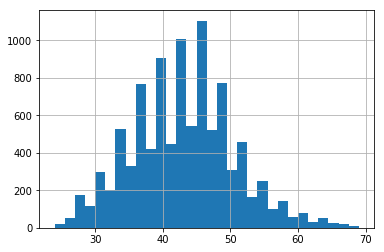

'0.0% de registros nulos'

'Variância: 0.009893085631781297'

,qtd,pc
0,9809,0.99
1,99,0.01


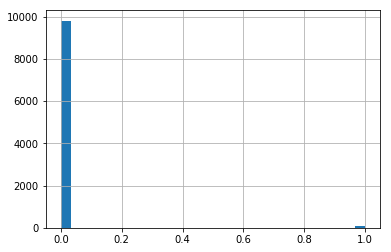

'99.00080742834074% de registros nulos'

'Variância: 0.0484436198721912'

,qtd,pc
0.00,94,0.01
1.00,5,0.00


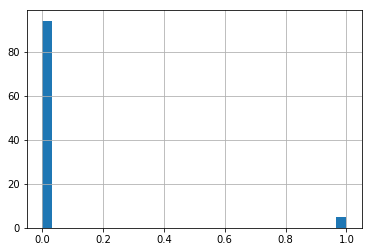

'99.00080742834074% de registros nulos'

'Variância: 0.16285301999587712'

,qtd,pc
0.00,79,0.01
1.00,20,0.00


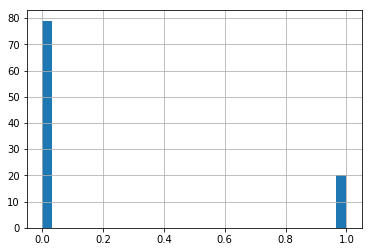

'99.00080742834074% de registros nulos'

'Variância: 0.03916718202432491'

,qtd,pc
0.00,95,0.01
1.00,4,0.00


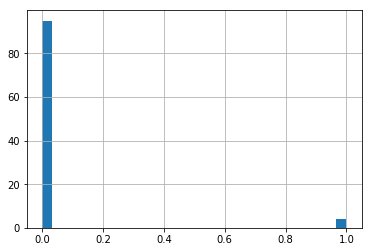

'99.00080742834074% de registros nulos'

'Variância: 0.1076066790352505'

,qtd,pc
0.00,87,0.01
1.00,12,0.00


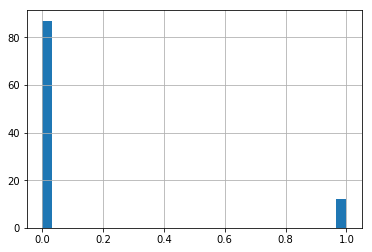

'99.00080742834074% de registros nulos'

'Variância: 0.0'

,qtd,pc
0.00,99,0.01


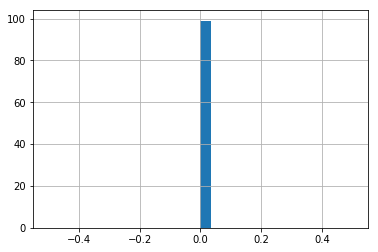

'99.00080742834074% de registros nulos'

'Variância: 0.24118738404452675'

,qtd,pc
1.00,60,0.01
0.00,39,0.00


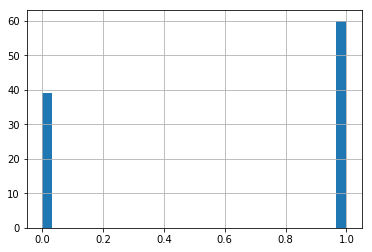

'99.00080742834074% de registros nulos'

'Variância: 0.0'

,qtd,pc
0.00,99,0.01


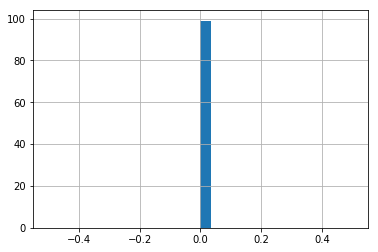

'99.00080742834074% de registros nulos'

'Variância: 0.019995877138734245'

,qtd,pc
0.00,97,0.01
1.00,2,0.00


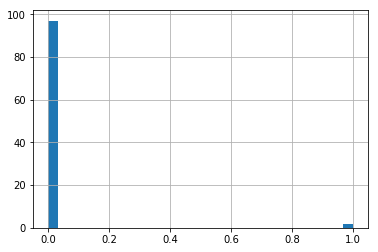

'0.0% de registros nulos'

'Variância: 0.021713440853795767'

,qtd,pc
4,9688,0.98
3,220,0.02


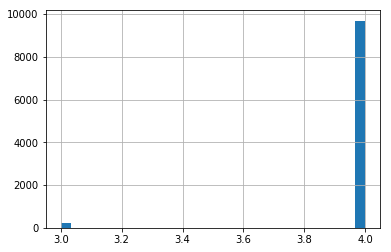

'2.2204279370205895% de registros nulos'

'Variância: 0.2467041015625'

,qtd,pc
1.00,5409,0.55
0.00,4279,0.43


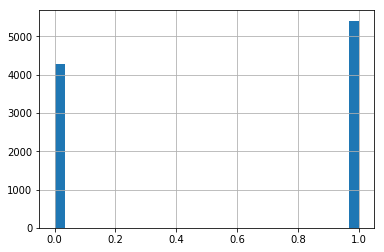

'2.2204279370205895% de registros nulos'

'Variância: 0.0300445556640625'

,qtd,pc
0.00,9388,0.95
1.00,300,0.03


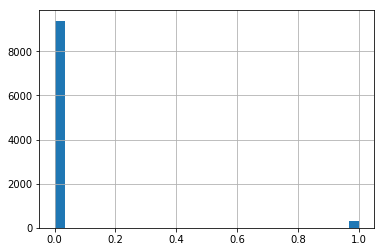

'2.2204279370205895% de registros nulos'

'Variância: 0.00226593017578125'

,qtd,pc
0.00,9666,0.98
1.00,22,0.00


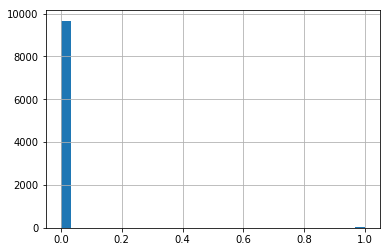

'2.2204279370205895% de registros nulos'

'Variância: 0.243408203125'

,qtd,pc
0.00,5631,0.57
1.00,4057,0.41


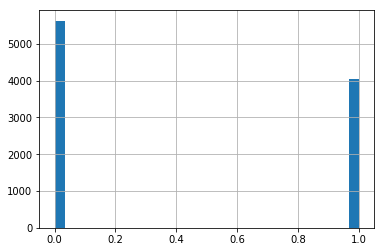

'0.0% de registros nulos'

'Variância: 0.01813061512437082'

,qtd,pc
1,9725,0.98
0,183,0.02


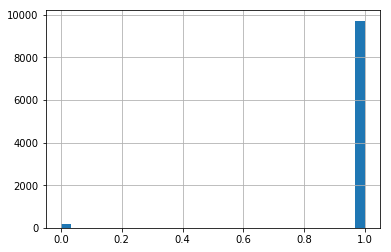

'0.0% de registros nulos'

'Variância: 0.25001544439997664'

,qtd,pc
1,4985,0.50
0,4923,0.50


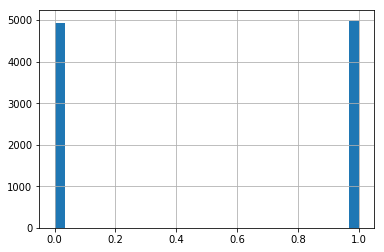

'0.0% de registros nulos'

'Variância: 0.19918141420091792'

,qtd,pc
1,7188,0.73
0,2720,0.27


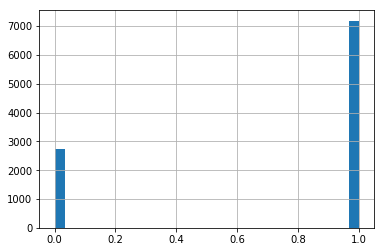

'0.0% de registros nulos'

'Variância: 0.19163770094580443'

,qtd,pc
1,7348,0.74
0,2560,0.26


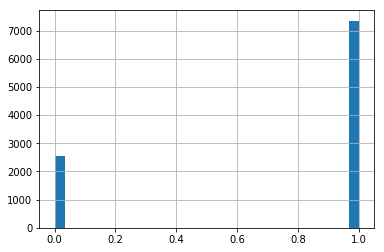

'0.0% de registros nulos'

'Variância: 0.05890489057316615'

,qtd,pc
1,9362,0.94
2,313,0.03
0,220,0.02
3,13,0.00


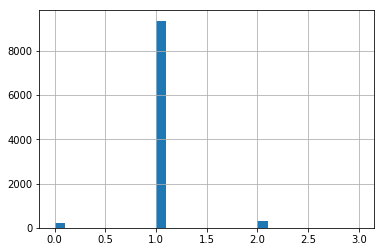

'0.0% de registros nulos'

'Variância: 0.2707247140025165'

,qtd,pc
1,5233,0.53
0,4568,0.46
2,103,0.01
3,4,0.00


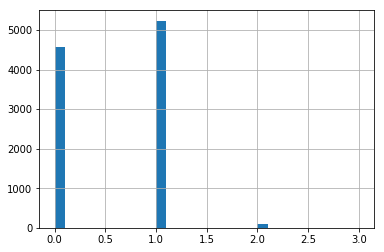

'0.0% de registros nulos'

'Variância: 0.27523909377802985'

,qtd,pc
0,5398,0.54
1,4388,0.44
2,118,0.01
3,4,0.00


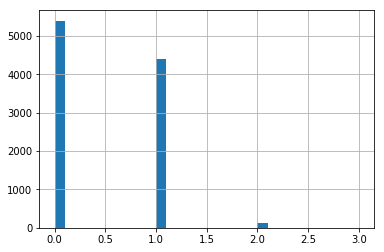

'0.0% de registros nulos'

'Variância: 0.1427312255897489'

,qtd,pc
1,8355,0.84
0,1390,0.14
2,159,0.02
3,4,0.00


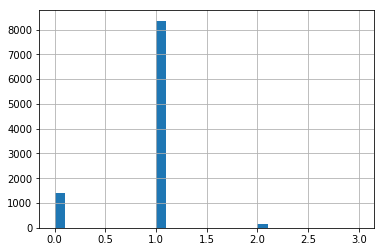

'0.0% de registros nulos'

'Variância: 0.10729689218329577'

,qtd,pc
0,8737,0.88
1,1160,0.12
2,11,0.00


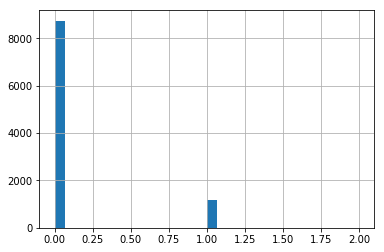

'0.0% de registros nulos'

'Variância: 0.24022108678941856'

,qtd,pc
True,5935,0.60
False,3973,0.40


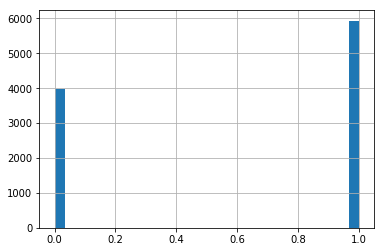

'0.0% de registros nulos'

'Variância: 0.21964042543576134'

,qtd,pc
True,6681,0.67
False,3227,0.33


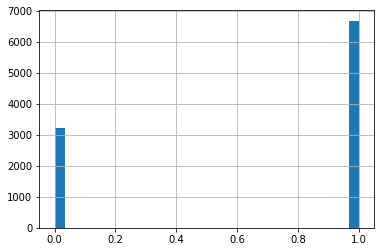

'0.0% de registros nulos'

'Variância: 0.21957000875196245'

,qtd,pc
True,6683,0.67
False,3225,0.33


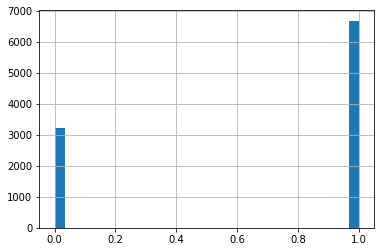

'0.0% de registros nulos'

'Variância: 0.10381028832575735'

,qtd,pc
1,8852,0.89
0,843,0.09
2,209,0.02
3,4,0.00


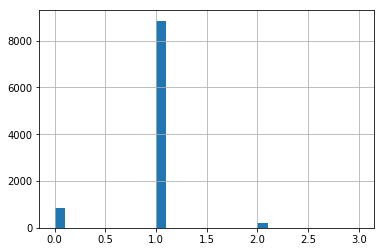

'0.0% de registros nulos'

'Variância: 0.031742225303314366'

,qtd,pc
0,9586,0.97
1,321,0.03
2,1,0.00


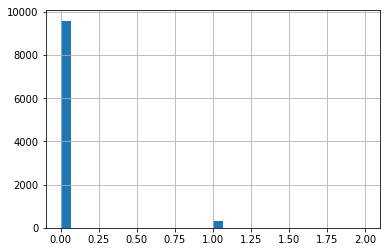

'0.0% de registros nulos'

'Variância: 0.012463213089646511'

,qtd,pc
0,9786,0.99
1,121,0.01
2,1,0.00


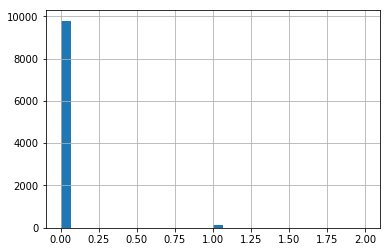

'0.0% de registros nulos'

'Variância: 0.015993582872184876'

,qtd,pc
0,9750,0.98
1,157,0.02
2,1,0.00


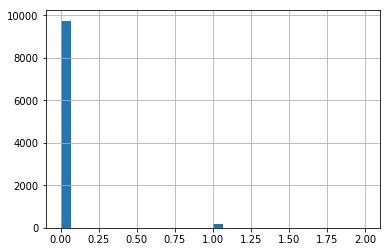

'0.0% de registros nulos'

'Variância: 0.0026175201680839724'

,qtd,pc
0,9882,1.00
1,26,0.00


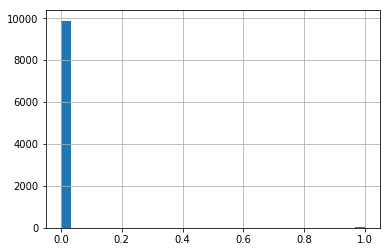

'0.0% de registros nulos'

'Variância: 0.0003027245021819595'

,qtd,pc
0,9905,1.00
1,3,0.00


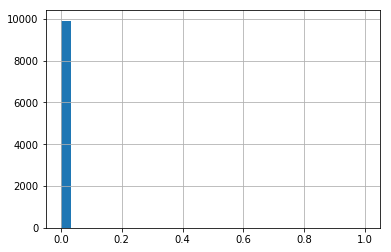

'0.0% de registros nulos'

'Variância: 0.004821586821224225'

,qtd,pc
0,9860,1.00
1,48,0.00


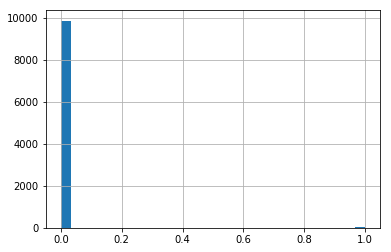

'0.0% de registros nulos'

'Variância: 0.00020183670998583138'

,qtd,pc
0,9906,1.00
1,2,0.00


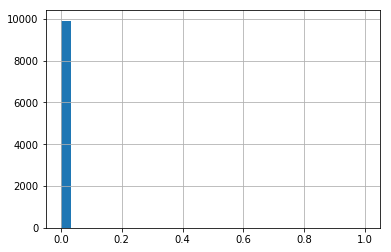

'0.0% de registros nulos'

'Variância: 0.012064429717160874'

,qtd,pc
0,9787,0.99
1,121,0.01


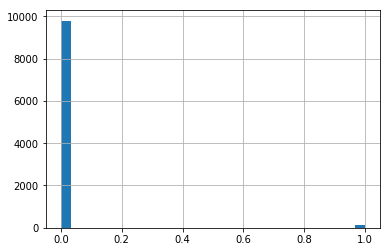

'0.0% de registros nulos'

'Variância: 0.2275592868338446'

,qtd,pc
0,6439,0.65
1,3469,0.35


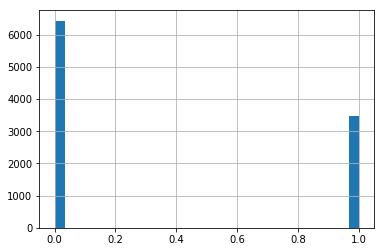

'0.0% de registros nulos'

'Variância: 0.21172270504875812'

,qtd,pc
0,6893,0.70
1,3015,0.30


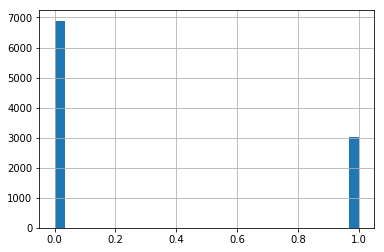

'0.0% de registros nulos'

'Variância: 0.042716551372251235'

,qtd,pc
0,9465,0.96
1,443,0.04


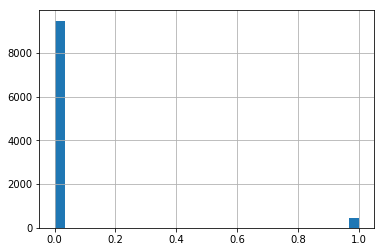

'0.0% de registros nulos'

'Variância: 0.2078775486469055'

,qtd,pc
0,6988,0.71
1,2920,0.29


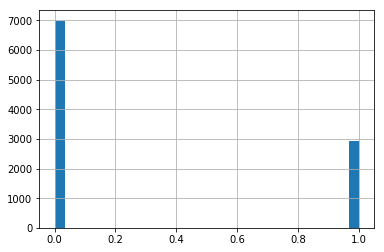

'0.0% de registros nulos'

'Variância: 0.0051213772949145675'

,qtd,pc
0,9857,0.99
1,51,0.01


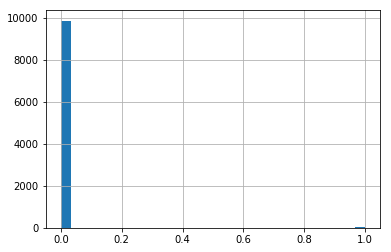

'0.0% de registros nulos'

'Variância: 0.0010083685420148186'

,qtd,pc
0,9898,1.00
1,10,0.00


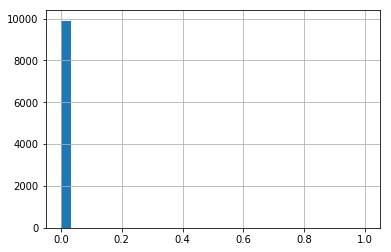

'92.50100928542592% de registros nulos'

'Variância: 0.8697928192328951'

,qtd,pc
1.00,724,0.07
2.00,10,0.00
7.00,3,0.00
14.00,2,0.00
9.00,1,0.00
11.00,1,0.00
4.00,1,0.00
6.00,1,0.00


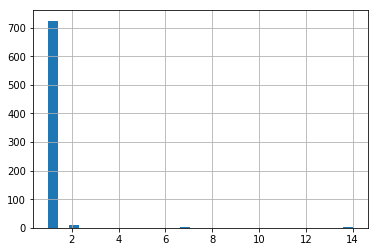

'89.72547436415019% de registros nulos'

'Variância: 21.649090220669002'

count   1018.00
mean       8.75
std        4.65
min        1.00
25%        5.00
50%        8.00
75%       13.00
max       30.00
Name: NU_QTD_TURMAS_MEDIO_2007, dtype: float64

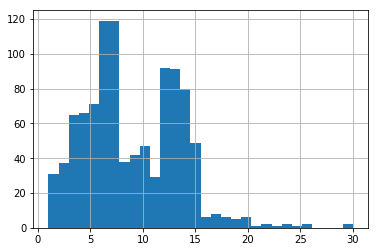

'94.38837303189342% de registros nulos'

'Variância: 0.546192235400865'

,qtd,pc
1.00,543,0.05
2.00,5,0.00
5.00,3,0.00
9.00,1,0.00
7.00,1,0.00
6.00,1,0.00
10.00,1,0.00
8.00,1,0.00


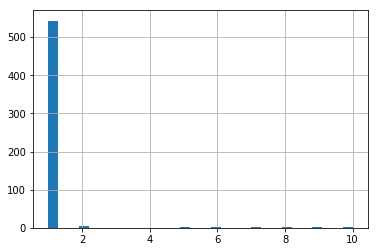

'88.86758175211949% de registros nulos'

'Variância: 22.561353049676462'

count   1103.00
mean       9.72
std        4.75
min        1.00
25%        6.00
50%       10.00
75%       13.00
max       29.00
Name: NU_QTD_TURMAS_MEDIO_2009, dtype: float64

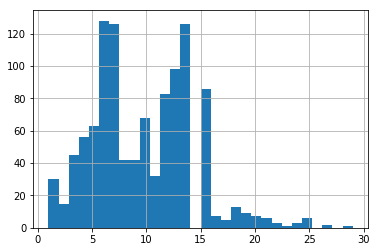

'94.62050867985467% de registros nulos'

'Variância: 2.425073001452974'

,qtd,pc
1.00,517,0.05
2.00,4,0.00
3.00,3,0.00
5.00,2,0.00
4.00,2,0.00
31.00,1,0.00
13.00,1,0.00
8.00,1,0.00
6.00,1,0.00
12.00,1,0.00


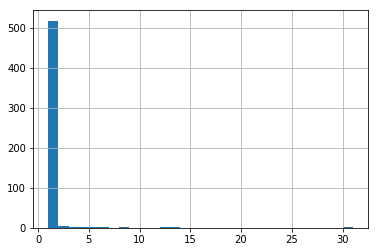

'87.27291077916834% de registros nulos'

'Variância: 23.985361831753494'

count   1261.00
mean      10.11
std        4.90
min        1.00
25%        6.00
50%       10.00
75%       14.00
max       30.00
Name: NU_QTD_TURMAS_MEDIO_2011, dtype: float64

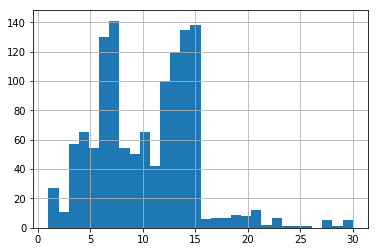

'93.80298748486072% de registros nulos'

'Variância: 0.7531630099207813'

,qtd,pc
1.00,602,0.06
5.00,4,0.00
8.00,2,0.00
9.00,1,0.00
7.00,1,0.00
10.00,1,0.00
2.00,1,0.00
12.00,1,0.00
3.00,1,0.00


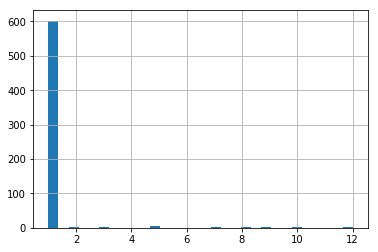

'85.39563988696003% de registros nulos'

'Variância: 20.628306191758387'

count   1447.00
mean       8.42
std        4.54
min        1.00
25%        6.00
50%        7.00
75%       12.00
max       28.00
Name: NU_QTD_TURMAS_MEDIO_2013, dtype: float64

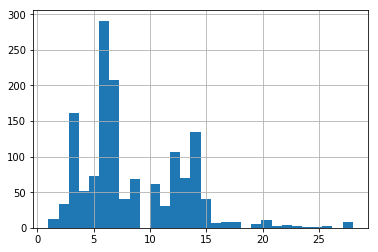

'92.74323778764635% de registros nulos'

'Variância: 1.1870130675148267'

count   719.00
mean      1.19
std       1.09
min       1.00
25%       1.00
50%       1.00
75%       1.00
max      13.00
Name: NU_QTD_TURMAS_INFANT_2014, dtype: float64

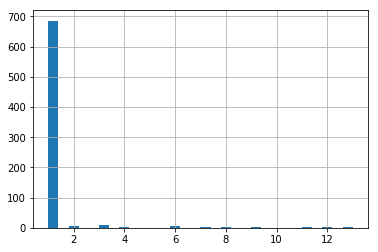

'83.08437626160679% de registros nulos'

'Variância: 23.563315641363438'

count   1676.00
mean       8.95
std        4.85
min        1.00
25%        6.00
50%        7.00
75%       12.25
max       40.00
Name: NU_QTD_TURMAS_MEDIO_2014, dtype: float64

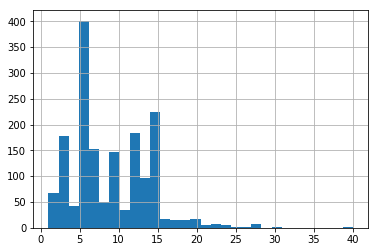

'92.56156641098102% de registros nulos'

'Variância: 0.941533685328303'

count   737.00
mean      1.13
std       0.97
min       1.00
25%       1.00
50%       1.00
75%       1.00
max      13.00
Name: NU_QTD_TURMAS_INFANT_2015, dtype: float64

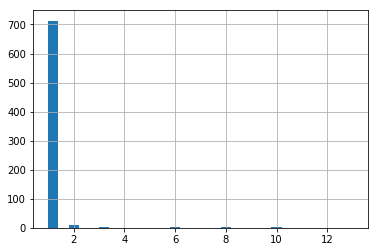

'82.11546225272507% de registros nulos'

'Variância: 20.716712255258813'

count   1772.00
mean       8.95
std        4.55
min        1.00
25%        6.00
50%        8.00
75%       12.00
max       38.00
Name: NU_QTD_TURMAS_MEDIO_2015, dtype: float64

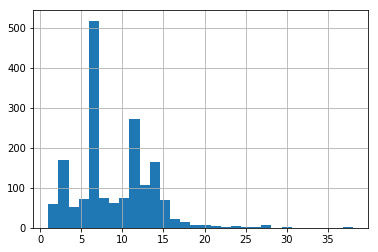

In [11]:
explora_df(prof_pbc_df15)

In [18]:
prof_pbc_df15.to_csv(f'{PATH_DF_CSV}dados_prof.csv')

In [6]:
prof_pbc_df15 = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}dados_prof.csv',index_col='CO_PESSOA_FISICA'))
prof_pbc_df15.head()

,NU_IDADE_REFERENCIA,IN_POSSUI_NEC_ESPECIAL,IN_CEGUEIRA,IN_BAIXA_VISAO,IN_SURDEZ,IN_DEF_AUDITIVA,IN_SURDOCEGUEIRA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_DEF_MULTIPLA,...,NU_GRAD_AREA_AGRICULTURA,NU_GRAD_AREA_SERVICOS,NU_GRAD_AREA_SAUDE,NU_GRAD_AREA_OUTROS,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5
CO_PESSOA_FISICA,,,,,,,,,,,,,,,,,,,,,
115161698917,41,0,nan,nan,nan,nan,nan,nan,nan,nan,...,0,0,0,0,1,0,0,0,0,0
115111512003,54,0,nan,nan,nan,nan,nan,nan,nan,nan,...,0,0,0,0,0,0,1,0,0,0
115075856674,41,0,nan,nan,nan,nan,nan,nan,nan,nan,...,0,0,0,0,1,0,0,0,0,0
115075569420,47,0,nan,nan,nan,nan,nan,nan,nan,nan,...,0,0,0,0,1,0,0,0,0,0
115076358503,41,0,nan,nan,nan,nan,nan,nan,nan,nan,...,0,0,0,0,0,1,0,0,0,0


<table columns=2 style='width:100%'><tr><td>
<img src='img/LisaSchool.png'/></td><td> <h2>Professores/Escolas.</h2><br/>
    Professores selecionados no item 'Professores' que estavam em escolas em funcionamento em 2015 e 2017.</td></tr></table>

In [20]:
#escolas da rede publica do DF em funcionamento em 
#2015 que estavam em funcionamento tambem em 2017
fen = lambda df: df.loc[(df.CO_UF == 53) & (df.TP_SITUACAO_FUNCIONAMENTO == 1) & (df.TP_DEPENDENCIA == 2)] 
fev = lambda df: df.loc[(df.FK_COD_ESTADO == 53) & (df.DESC_SITUACAO_FUNCIONAMENTO == 1) & (df.ID_DEPENDENCIA_ADM == 2)] 
l_df_escolas = lambda ano: monta_df_docente(f'{ARQ_PATH}{ano}/ESCOLAS.CSV')
escolas_df = {a : fen(l_df_escolas(a)) if a >= 2015 else fev(l_df_escolas(a)) for a in tqdm(anos_psq)}


100%|██████████| 7/7 [01:44<00:00, 15.00s/it]


In [21]:
#seleciona os PROFESSORES | ESCOLA | TURMA de cada um dos anos
#seleciona professores de escolas em funcionamento em 2017.
df15_pbc = dfs[2015].loc[(dfs[2015].CO_PESSOA_FISICA.isin(prof_pbc_df15.index)) & dfs[2015].CO_ENTIDADE.isin(escolas_df[2017].CO_ENTIDADE.values)]    
df17_pbc = dfs[2017].loc[dfs[2017].CO_PESSOA_FISICA.isin(prof_pbc_df15.index)]

In [22]:
#monta o DataFrame com PROFESSOR|ESCOLA para montar a target
a15 = df15_pbc[['CO_PESSOA_FISICA','CO_ENTIDADE']].drop_duplicates()
a17 = df17_pbc[['CO_PESSOA_FISICA','CO_ENTIDADE']].drop_duplicates()
display(a15.shape)
display(a17.shape)

dados_target = a15.merge(a17,on=['CO_PESSOA_FISICA','CO_ENTIDADE'], how='left',indicator=True)

(10639, 2)

(10647, 2)

In [23]:
display(dados_target.drop_duplicates().shape)
dados_target.drop_duplicates().head()

(10639, 3)

,CO_PESSOA_FISICA,CO_ENTIDADE,_merge
0,115161698917,53001206,both
1,115161698917,53011988,both
2,115111512003,53068181,both
3,115075856674,53013980,both
4,115075569420,53001893,both


In [24]:
display(dados_target._merge.value_counts())
dados_target['target'] = (dados_target._merge == 'left_only').astype(np.int8)

both          8167
left_only     2472
right_only       0
Name: _merge, dtype: int64

### <center> Temos target </center>
<img src='https://media.giphy.com/media/3o6MbkNYWUzAuKmDa8/giphy.gif'>


In [25]:
dados_target.drop('_merge',axis=1).to_csv(f'{PATH_DF_CSV}target.csv',index=False)

In [7]:
dados_target = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}target.csv'))

### Interação entre professores | escolas
<br/>
<br/>
01. Verificação nos arquivos anteriores
<br/>
<br/>
    - Tempo na escola
<br/>
    - Quantidade de turmas em 2014
<br/>
    - Quantidade de turmas em 2013
<br/>
    - Quantidade de turmas em 2011
<br/>
    - Quantidade de turmas em 2009
<br/>
    - Quantidade de turmas em 2007
<br/>
<br/>
02. Quantidade de turmas em 2015
<br/>
<br/>
03. TP_ETAPA_ENSINO
<br/>
<br/>
    - Qtd turmas infantil (1,2,3)
<br/>
    - Qtd turmas até 3ª serie (4,5,6,14,15,16,56)
<br/>
    - Qtd turmas até 6ª serie (7,8,9,17,18,19)
<br/>
    - Qtd turmas até 9ª serie (10,11,12,20,21,41)
<br/>
    - Qtd turmas Ensino Medio (25,26,27,28,29)
<br/>
    - Qtd turmas Tecnico (30 ao 40, 64,67,68,74)
<br/>
    - Qtd turmas Multi Etapa, Correcao (12,13,23,24,29)
<br/>
    - Qtd turmas EJA (65,69,70,71,72,73)
<br/>
<br/>
<b>INTERACAO PROFESSOR TURMA</b>
<br/>
<br/>
04. IN_DISC: separar materias para ver se a formacao coincide com a disciplinas ministrada.
<br/>
<br/>
05. TP_RACA: proporcao de alunos mesma RACA/COR prof.



target  NU_QTD_TURMAS_2007_PROF_ESC  \
CO_PESSOA_FISICA CO_ENTIDADE                                        
115161698917     53001206          0                         0.00   
                 53011988          0                         0.00   
115111512003     53068181          0                         0.00   
115075856674     53013980          0                         0.00   
115075569420     53001893          0                         3.00   

                              NU_QTD_TURMAS_REG_2007_PROF_ESC  \
CO_PESSOA_FISICA CO_ENTIDADE                                    
115161698917     53001206                                0.00   
                 53011988                                0.00   
115111512003     53068181                                0.00   
115075856674     53013980                                0.00   
115075569420     53001893                                3.00   

                              NU_QTD_TURMAS_EJA_2007_PROF_ESC  \
CO_PESSOA_FISICA CO_ENTIDADE                                    
115161698917     53001206                                0.00   
                 53011988                                0.00   
115111512003     53068181                                0.00   
115075856674     53013980                                0.00   
115075569420     53001893                                0.00   

                              NU_QTD_TURMAS_INFANT_2007_PROF_ESC  \
CO_PESSOA_FISICA CO_ENTIDADE                                       
115161698917     53001206                                   0.00   
                 53011988                                   0.00   
115111512003     53068181                                   0.00   
115075856674     53013980                                   0.00   
115075569420     53001893                                   0.00   

                              NU_QTD_TURMAS_MEDIO_2007_PROF_ESC  \
CO_PESSOA_FISICA CO_ENTIDADE                                      
115161698917     53001206                                  0.00   
                 53011988                                  0.00   
115111512003     53068181                                  0.00   
115075856674     53013980                                  0.00   
115075569420     53001893                                  0.00   

                              NU_QTD_TURMAS_2009_PROF_ESC  \
CO_PESSOA_FISICA CO_ENTIDADE                                
115161698917     53001206                            0.00   
                 53011988                            4.00   
115111512003     53068181                            0.00   
115075856674     53013980                            0.00   
115075569420     53001893                            4.00   

                              NU_QTD_TURMAS_REG_2009_PROF_ESC  \
CO_PESSOA_FISICA CO_ENTIDADE                                    
115161698917     53001206                                0.00   
                 53011988                                0.00   
115111512003     53068181                                0.00   
115075856674     53013980                                0.00   
115075569420     53001893                                4.00   

                              NU_QTD_TURMAS_EJA_2009_PROF_ESC  \
CO_PESSOA_FISICA CO_ENTIDADE                                    
115161698917     53001206                                0.00   
                 53011988                                4.00   
115111512003     53068181                                0.00   
115075856674     53013980                                0.00   
115075569420     53001893                                0.00   

                              NU_QTD_TURMAS_INFANT_2009_PROF_ESC  \
CO_PESSOA_FISICA CO_ENTIDADE                                       
115161698917     53001206                                   0.00   
                 53011988                                   0.00   
115111512003     53068181                                   0.00   
1150758

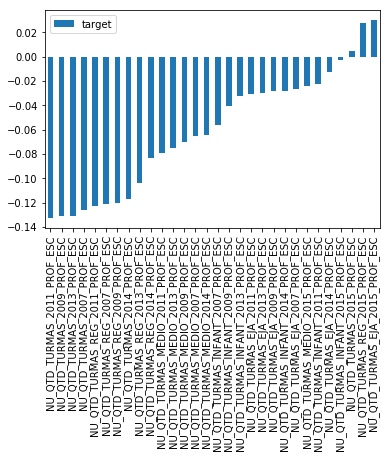

'0.0% de registros nulos'

'Variância: 0.1783816706901631'

,qtd,pc
0,8167,0.77
1,2472,0.23


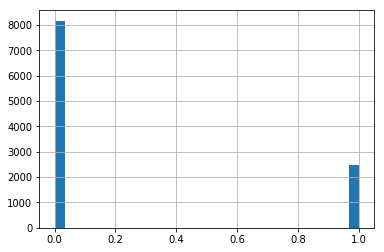

'0.0% de registros nulos'

'Variância: 9.559134052596377'

count   10639.00
mean        1.19
std         3.09
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        30.00
Name: NU_QTD_TURMAS_2007_PROF_ESC, dtype: float64

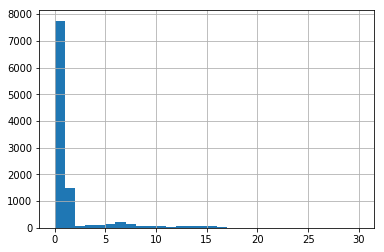

'0.0% de registros nulos'

'Variância: 8.790605695565306'

count   10639.00
mean        1.05
std         2.96
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        30.00
Name: NU_QTD_TURMAS_REG_2007_PROF_ESC, dtype: float64

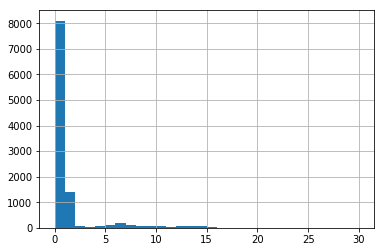

'0.0% de registros nulos'

'Variância: 0.8579598581991098'

count   10639.00
mean        0.12
std         0.93
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        25.00
Name: NU_QTD_TURMAS_EJA_2007_PROF_ESC, dtype: float64

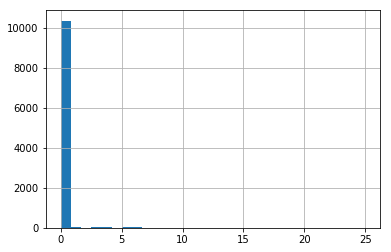

'0.0% de registros nulos'

'Variância: 0.07991466020660659'

,qtd,pc
0.00,10255,0.96
1.00,372,0.03
2.00,5,0.00
7.00,3,0.00
9.00,1,0.00
14.00,1,0.00
4.00,1,0.00
6.00,1,0.00


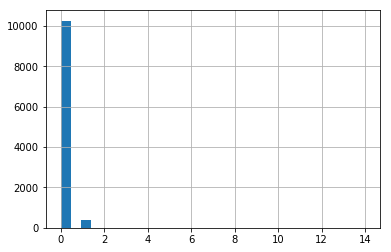

'0.0% de registros nulos'

'Variância: 4.8297170284856765'

count   10639.00
mean        0.44
std         2.20
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        30.00
Name: NU_QTD_TURMAS_MEDIO_2007_PROF_ESC, dtype: float64

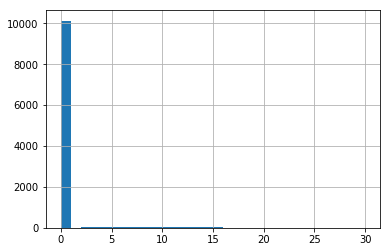

'0.0% de registros nulos'

'Variância: 13.67711798515203'

count   10639.00
mean        1.68
std         3.70
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        58.00
Name: NU_QTD_TURMAS_2009_PROF_ESC, dtype: float64

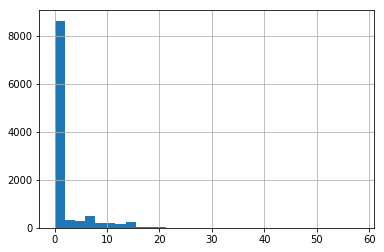

'0.0% de registros nulos'

'Variância: 11.313076777802744'

count   10639.00
mean        1.34
std         3.36
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        29.00
Name: NU_QTD_TURMAS_REG_2009_PROF_ESC, dtype: float64

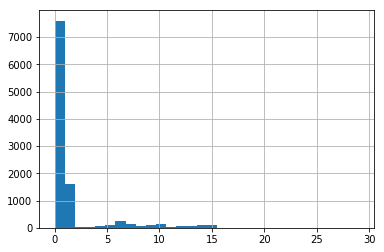

'0.0% de registros nulos'

'Variância: 2.081304686908634'

count   10639.00
mean        0.22
std         1.44
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        58.00
Name: NU_QTD_TURMAS_EJA_2009_PROF_ESC, dtype: float64

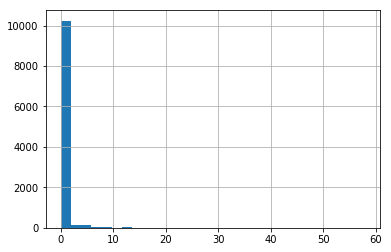

'0.0% de registros nulos'

'Variância: 0.04891194007665754'

,qtd,pc
0.00,10334,0.97
1.00,295,0.03
2.00,5,0.00
5.00,2,0.00
9.00,1,0.00
7.00,1,0.00
6.00,1,0.00


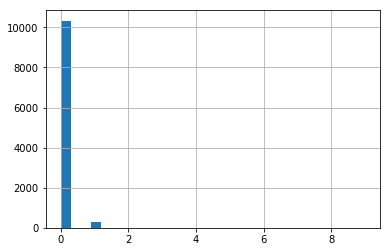

'0.0% de registros nulos'

'Variância: 7.093519144525871'

count   10639.00
mean        0.62
std         2.66
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        29.00
Name: NU_QTD_TURMAS_MEDIO_2009_PROF_ESC, dtype: float64

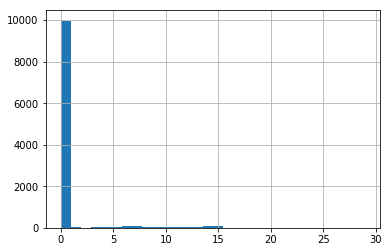

'0.0% de registros nulos'

'Variância: 15.582181370353535'

count   10639.00
mean        2.13
std         3.95
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        31.00
Name: NU_QTD_TURMAS_2011_PROF_ESC, dtype: float64

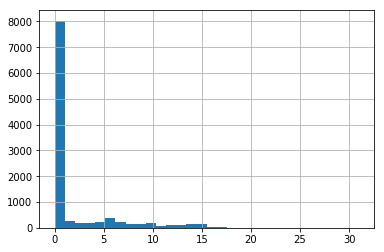

'0.0% de registros nulos'

'Variância: 14.109478686796745'

count   10639.00
mean        1.76
std         3.76
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        30.00
Name: NU_QTD_TURMAS_REG_2011_PROF_ESC, dtype: float64

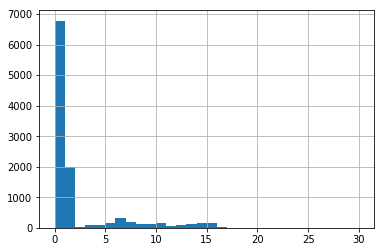

'0.0% de registros nulos'

'Variância: 1.7757149682570403'

count   10639.00
mean        0.28
std         1.33
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        17.00
Name: NU_QTD_TURMAS_EJA_2011_PROF_ESC, dtype: float64

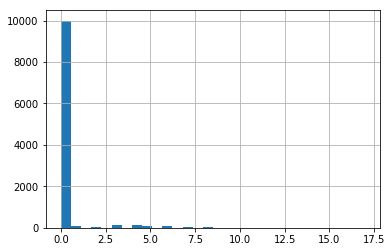

'0.0% de registros nulos'

'Variância: 0.17557648865788464'

count   10639.00
mean        0.05
std         0.42
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        31.00
Name: NU_QTD_TURMAS_INFANT_2011_PROF_ESC, dtype: float64

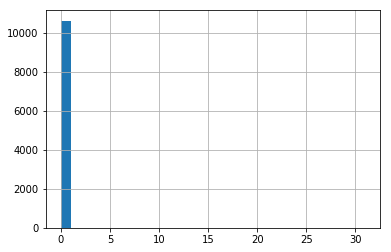

'0.0% de registros nulos'

'Variância: 9.441760399371322'

count   10639.00
mean        0.84
std         3.07
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        30.00
Name: NU_QTD_TURMAS_MEDIO_2011_PROF_ESC, dtype: float64

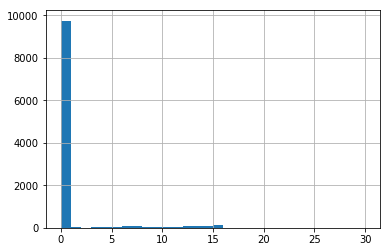

'0.0% de registros nulos'

'Variância: 16.169810811287647'

count   10639.00
mean        2.78
std         4.02
min         0.00
25%         0.00
50%         1.00
75%         5.00
max        33.00
Name: NU_QTD_TURMAS_2013_PROF_ESC, dtype: float64

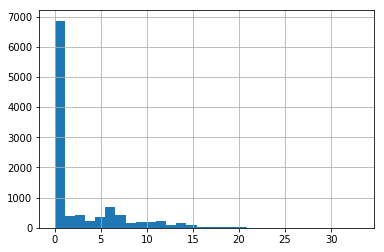

'0.0% de registros nulos'

'Variância: 14.32629394194581'

count   10639.00
mean        2.16
std         3.79
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        30.00
Name: NU_QTD_TURMAS_REG_2013_PROF_ESC, dtype: float64

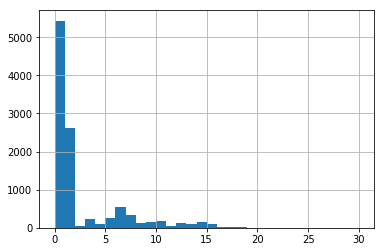

'0.0% de registros nulos'

'Variância: 2.04002744993515'

count   10639.00
mean        0.36
std         1.43
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        15.00
Name: NU_QTD_TURMAS_EJA_2013_PROF_ESC, dtype: float64

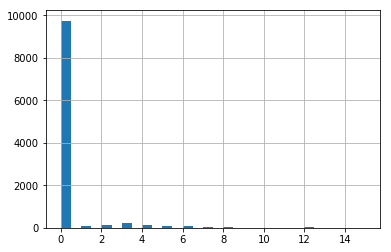

'0.0% de registros nulos'

'Variância: 0.09823237058341651'

,qtd,pc
0.00,10170,0.96
1.00,457,0.04
5.00,4,0.00
8.00,2,0.00
9.00,1,0.00
7.00,1,0.00
10.00,1,0.00
2.00,1,0.00
12.00,1,0.00
3.00,1,0.00


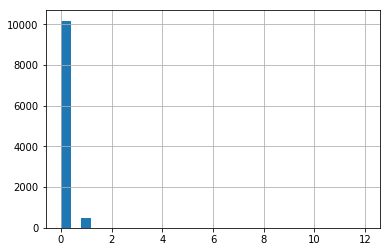

'0.0% de registros nulos'

'Variância: 8.340774447033187'

count   10639.00
mean        0.88
std         2.89
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        28.00
Name: NU_QTD_TURMAS_MEDIO_2013_PROF_ESC, dtype: float64

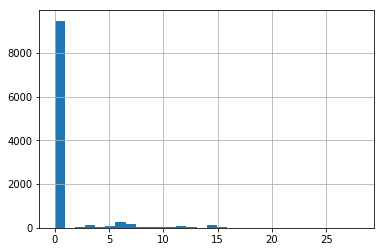

'0.0% de registros nulos'

'Variância: 19.765675815837007'

count   10639.00
mean        3.63
std         4.45
min         0.00
25%         1.00
50%         1.00
75%         6.00
max        31.00
Name: NU_QTD_TURMAS_2014_PROF_ESC, dtype: float64

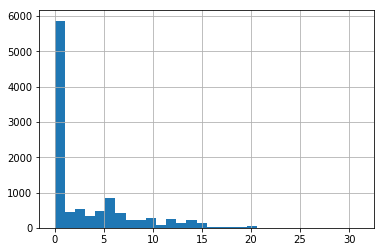

'0.0% de registros nulos'

'Variância: 17.940510497467873'

count   10639.00
mean        2.78
std         4.24
min         0.00
25%         0.00
50%         1.00
75%         5.00
max        30.00
Name: NU_QTD_TURMAS_REG_2014_PROF_ESC, dtype: float64

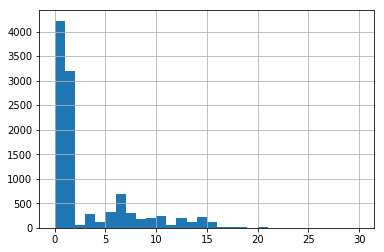

'0.0% de registros nulos'

'Variância: 2.484817934335121'

count   10639.00
mean        0.44
std         1.58
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        21.00
Name: NU_QTD_TURMAS_EJA_2014_PROF_ESC, dtype: float64

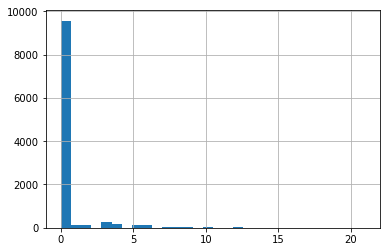

'0.0% de registros nulos'

'Variância: 0.14414267646863338'

count   10639.00
mean        0.07
std         0.38
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        13.00
Name: NU_QTD_TURMAS_INFANT_2014_PROF_ESC, dtype: float64

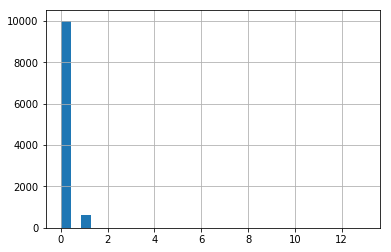

'0.0% de registros nulos'

'Variância: 11.991552504143772'

count   10639.00
mean        1.21
std         3.46
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        30.00
Name: NU_QTD_TURMAS_MEDIO_2014_PROF_ESC, dtype: float64

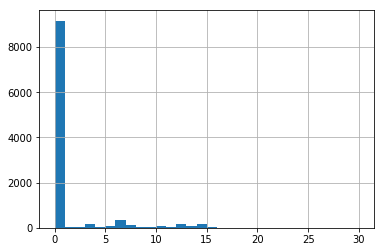

'0.0% de registros nulos'

'Variância: 19.056353248157492'

count   10639.00
mean        4.56
std         4.37
min         1.00
25%         1.00
50%         3.00
75%         7.00
max        38.00
Name: NU_QTD_TURMAS_2015_PROF_ESC, dtype: float64

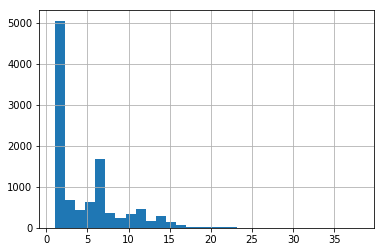

'0.0% de registros nulos'

'Variância: 19.109375'

count   10639.00
mean        3.53
std         4.37
min         0.00
25%         1.00
50%         1.00
75%         6.00
max        38.00
Name: NU_QTD_TURMAS_REG_2015_PROF_ESC, dtype: float64

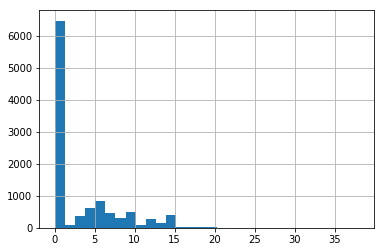

'0.0% de registros nulos'

'Variância: 2.87109375'

count   10639.00
mean        0.55
std         1.69
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        17.00
Name: NU_QTD_TURMAS_EJA_2015_PROF_ESC, dtype: float64

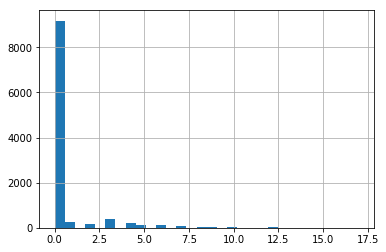

'0.0% de registros nulos'

'Variância: 0.14790986795431652'

count   10639.00
mean        0.08
std         0.38
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        13.00
Name: NU_QTD_TURMAS_INFANT_2015_PROF_ESC, dtype: float64

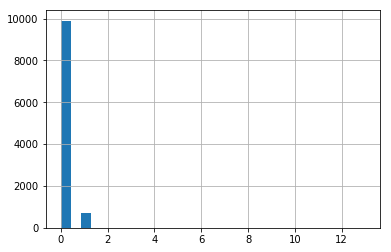

'0.0% de registros nulos'

'Variância: 14.051415967328591'

count   10639.00
mean        1.49
std         3.75
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        38.00
Name: NU_QTD_TURMAS_MEDIO_2015_PROF_ESC, dtype: float64

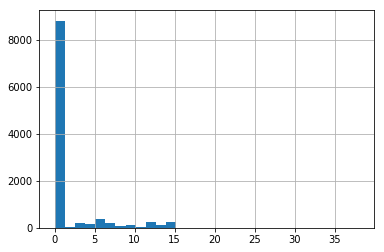

In [30]:
#quantidade de turmas ano a ano
relacoes = dados_target.copy()



for k,v in dfs.items():
    if k < 2017:
        #conta total de turmas diferentes
        agp = v.groupby(['FK_COD_DOCENTE','PK_COD_ENTIDADE'])[['PK_COD_TURMA']] \
        if k < 2015 else v.groupby(['CO_PESSOA_FISICA','CO_ENTIDADE'])[['ID_TURMA']]
        a = agp.nunique().reset_index()
        a.columns = ['CO_PESSOA_FISICA','CO_ENTIDADE',f'NU_QTD_TURMAS_{k}']
        relacoes = relacoes.merge(a, \
                       on=['CO_PESSOA_FISICA','CO_ENTIDADE'], \
                       how='left')
        #conta turmas por tipo
        relacoes = relacoes.merge(monta_por_tip_ensino(v,1,'REG',k), \
                       on=['CO_PESSOA_FISICA','CO_ENTIDADE'], \
                       how='left')
        relacoes = relacoes.merge(monta_por_tip_ensino(v,3,'EJA',k), \
                       on=['CO_PESSOA_FISICA','CO_ENTIDADE'], \
                       how='left')
        #turmas infantil e medio    
        relacoes = relacoes.merge(monta_por_tip_serie(v,'INFANT',k), \
                       on=['CO_PESSOA_FISICA','CO_ENTIDADE'], \
                       how='left')
        relacoes = relacoes.merge(monta_por_tip_serie(v,'MEDIO',k), \
                       on=['CO_PESSOA_FISICA','CO_ENTIDADE'], \
                       how='left')
        #relacoes.drop(['FK_COD_DOCENTE','PK_COD_ENTIDADE'],axis=1,inplace=True)

relacoes.fillna(0,inplace=True)
relacoes.set_index(['CO_PESSOA_FISICA','CO_ENTIDADE'],inplace=True)
display(relacoes.head())
display(relacoes.corr()[['target']].iloc[1:].sort_values('target').plot.bar())
plt.show()
explora_df(relacoes)

In [28]:
display(t15.shape)
t15 = t15.loc[t15.CO_ENTIDADE.isin(dados_target.CO_ENTIDADE.values)]
display(t15.shape)

(2522857, 88)

(23709, 88)

In [30]:
display(dfs[2015].shape[0])
dfs[2015].loc[dfs[2015].ID_TURMA.isin(t15.ID_TURMA)].shape[0]

80796

80666

In [38]:
df15.ID_TURMA.head(50)

9      3356441
15     3354085
29     5499445
31     3144658
33     5495387
34      600714
43     2992340
44     2992340
48     3102672
62     5553703
76     3215411
77      273280
78      273282
81      273283
101    3175727
104    3757369
107    3456014
110    3455096
123    3354550
126    3353965
140    4049627
141    4048504
169     765922
173    1367311
195      43039
201    3218513
202     273284
205     273285
208    1976365
209    2570022
211    1976706
223     217440
233    3452366
235    3454329
236    3456036
241    3456471
255    3353374
268    4046842
271    4045694
275    4047653
299    2990076
318    3146488
336    1295134
342    1411764
347    1976068
348    1976342
351     812428
369    3456129
373    3410679
385    3352303
Name: ID_TURMA, dtype: int64

In [43]:
df15.loc[df15.ID_TURMA.isin(t15.ID_TURMA.values)].shape

(80666, 135)

In [29]:
display(df07.PK_COD_TURMA.nunique())
display(df09.PK_COD_TURMA.nunique())
display(df11.PK_COD_TURMA.nunique())
display(df13.PK_COD_TURMA.nunique())
display(df14.PK_COD_TURMA.nunique())
display(df15.ID_TURMA.nunique())
display(df17.ID_TURMA.nunique())


18317

20765

16078

18643

19369

20769

20034

<table columns=2 style='width:100%'><tr><td>
<img src='img/cp_icon.png'/></td><td> <h2>Check-point, recarregando os DataFrames para analisar a situacao do DF e montar a target.</h2></td></tr></table>

In [ ]:
prof_df = pd.read_csv(f'{PATH_DF_CSV}prof_df.csv',low_memory=False)
pss_ano= pd.read_csv(f'{PATH_DF_CSV}pessoas_prof_df.csv',low_memory=False)

In [ ]:
display(pss_ano.reset_index().ANO.value_counts())
pss_ano.shape

In [ ]:
pss_ano.reset_index(inplace=True)
pss_ano = ajusta_colunas_int_df_inep(pss_ano,vai_printar_cols=False)

#### Curiosidade para ver o comportamento das variaveis

In [ ]:
for c in pss_ano.columns[2:]:
    if not c.startswith('CO'):
        for a in anos_pesquisa:
            display(a + ' - ' + c)
            if c.startswith('NU'):
                display(pss_ano.loc[pss_ano.ANO == int(a)][c].describe())
                pss_ano.loc[pss_ano.ANO == int(a)][c].hist()
            else:
                display(pss_ano.loc[pss_ano.ANO == int(a)][c].value_counts())
                pss_ano.loc[pss_ano.ANO == int(a)][c].value_counts().plot.bar()
            plt.show()
            #sns.barplot()
    


### Taxa de rotatividade de professores entre 2 anos .  




In [ ]:
def monta_saidas(pt, ano,turmas=[]):
    pe_ano = pt.loc[(pt.TP_DEPENDENCIA < 4) & (pt.ANO == int(ano)) & ((len(turmas)==0) | (pt.CO_ENTIDADE.isin(turmas)))][['CO_PESSOA_FISICA','CO_ENTIDADE']].drop_duplicates()
    pe_fut = pt.loc[(pt.TP_DEPENDENCIA < 4) & ((len(turmas)==0) | (pt.CO_ENTIDADE.isin(turmas))) & (pt.ANO == int(anos_pesquisa[anos_pesquisa.index(str(ano))+1])) & pt.CO_PESSOA_FISICA.isin(pe_ano.CO_PESSOA_FISICA.unique())][['CO_PESSOA_FISICA','CO_ENTIDADE']].drop_duplicates()
    pe_ano = pe_ano.loc[pe_ano.CO_PESSOA_FISICA.isin(pe_fut.CO_PESSOA_FISICA.unique())]
    to = pe_ano.merge(pe_fut,indicator=True,on=['CO_PESSOA_FISICA','CO_ENTIDADE'],how='outer')
    #vamos manter somente as escolas que estavam abertas nos 2 periodos
    to = to.loc[to._merge =='left_only']
    return to[['CO_PESSOA_FISICA','CO_ENTIDADE']],pe_ano,pe_fut


In [ ]:

for ano in anos_pesquisa[:-1]:
    t,a,f = monta_saidas(prof_df,ano)
    p = t.shape[0]/a.shape[0] * 100
    display(f'{ano}/{int(ano)+2} havia {a.shape[0]} professores/escola, houve {t.shape[0]} saidas ({p}%)');


### Como  o turnover total foi estável no período iremos modelar somente com o biênio 2015/2017

##### Importando dados de escolas e turmas de escolas publicas em funcionamento do DF

In [ ]:
def imp_esc_dist_atv_df(ano):
    d_esc = pd.read_csv(f'{ARQ_PATH}{ano}/ESCOLAS.CSV',sep='|',encoding='latin1',low_memory=False)
    d_esc.fillna(-1,inplace=True)
    d_esc = ajusta_colunas_int_df_inep(d_esc,vai_printar_cols=False)
    d_esc['ANO'] = ano
    return d_esc.loc[(d_esc.CO_UF == 53) & (d_esc.TP_SITUACAO_FUNCIONAMENTO == 1) & (d_esc.TP_DEPENDENCIA == 2)]

escolas = imp_esc_dist_atv_df(2017).append(imp_esc_dist_atv_df(2015))

escolas.head()

In [ ]:
def imp_turma_esc_atv_df(ano,escolas):
    d_tur = pd.read_csv(f'{ARQ_PATH}{ano}/TURMAS.CSV',sep='|',encoding='latin1',low_memory=False)
    d_tur.fillna(-1,inplace=True)
    d_tur = ajusta_colunas_int_df_inep(d_tur,vai_printar_cols=False)
    d_tur['ANO'] = ano
    return d_tur.loc[(d_tur.CO_ENTIDADE.isin(escolas))]


In [ ]:
turmas = imp_turma_esc_atv_df(2015,escolas.loc[escolas.ANO == 2015].CO_ENTIDADE.unique())\
        .append(imp_turma_esc_atv_df(2017,escolas.loc[escolas.ANO == 2017].CO_ENTIDADE.unique()))

In [ ]:
display(turmas.dtypes)
turmas.head()

In [ ]:
escolas.to_csv(f'{PATH_DF_CSV}escolas_distritais_15_17_func_df.csv',index=False)
turmas.to_csv(f'{PATH_DF_CSV}turmas_df.csv',index=False)

In [ ]:
escolas = pd.read_csv(f'{PATH_DF_CSV}escolas_distritais_15_17_func_df.csv',low_memory=False)
turmas = pd.read_csv(f'{PATH_DF_CSV}turmas_df.csv',low_memory=False)

In [ ]:
#escolas distritais que estavam funcionamento em 2015 e 2017
e17 = escolas.loc[(escolas.ANO == 2017)]['CO_ENTIDADE'].unique()
co_e15_17 = escolas.loc[(escolas.ANO == 2015) & (escolas.CO_ENTIDADE.isin(e17))]['CO_ENTIDADE'].unique()
display(len(e17))
display(len(co_e15_17))

In [ ]:
#turnover 2015 em escolas em funcionamento
ano = 2015
t,a,f = monta_saidas(prof_df,ano,turmas=co_e15_17)
p = t.shape[0]/a.shape[0] * 100
display(f'{ano}/{int(ano)+2} havia {a.shape[0]} professores/escola, houve {t.shape[0]} saidas ({p}%)');


### <center>  Temos publico e temos a target! </center>

<img src='https://media.giphy.com/media/3o6MbkNYWUzAuKmDa8/giphy.gif'>




In [ ]:
a = a.merge(t,on=['CO_ENTIDADE','CO_PESSOA_FISICA'],indicator=True,how='left')
a['target'] = a._merge == 'both'
a.drop('_merge',axis=1,inplace=True)
a['ano'] = 2015
display(a.target.value_counts())


In [ ]:
a.to_csv(f'{PATH_DF_CSV}prof_escola_target.csv',index=False)

In [ ]:
#atalho para montagem do professores
def atalho_prof_df2015():
    a = ajusta_colunas_int_df_inep(carrega_arquivo_docentes(f'{ARQ_PATH}2015/DOCENTES_CO.CSV'))
    a['ANO'] = 2015
    b = ajusta_colunas_int_df_inep(carrega_arquivo_docentes(f'{ARQ_PATH}2017/DOCENTES_CO.CSV'))
    b['ANO'] = 2017
    c = a.append(b)
    c.to_csv(f'{PATH_DF_CSV}prof_df.csv',index=None)
    del a, b
    return c
#prof_df = atalho_prof_df2015()


### Apaga arquivos nao utilizados

In [ ]:
import os
for path, subdirs, files in os.walk(ARQ_PATH):
    for name in files:
        if '_' in name and not name.endswith('_CO.CSV') and name.endswith('CSV'):
            f = os.path.join(path, name)
            !rm -rf {f}    

<table columns=2 style='width:100%'><tr><td><img src='img/cp_icon.png'/>
</td><td> <h2>Check-point, importando os DataFrames para criação de features.</h2></td></tr></table>

In [ ]:
escolas = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}escolas_distritais_15_17_func_df.csv',low_memory=False),vai_printar_cols=False)
turmas = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}turmas_df.csv',low_memory=False),vai_printar_cols=False)
prof_df = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}prof_df.csv',low_memory=False),vai_printar_cols=False)
pss_ano = None
try:
    pss_ano= ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}pessoas_prof_df.csv',low_memory=False),vai_printar_cols=False)
except Exception as e:
    print(f'Erro na importacao de pss_ano{e}')
    pass
pet = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}prof_escola_target.csv',low_memory=False),vai_printar_cols=False)

## 02. Criação de features para o estudo

- Localizacao:
    * criminalidade
    * linhas de onibus
    * contexto social (setor censitario)
- Infra da escola
    * situacao da escola
- Turma
    * alunos
    * disciplina da turma x displina de formacao




#### Iremos começar com os dados que já temos (escolas e turmas).

- Selecionando features das escolas, professores e turmas.

In [ ]:
list(map(print,prof_df.columns));


In [ ]:
list(map(print,turmas.columns))
cols_sel = [
    'CO_TIPO_ATIVIDADE_1',    'CO_TIPO_ATIVIDADE_2',    'CO_TIPO_ATIVIDADE_3',
'CO_TIPO_ATIVIDADE_4','CO_TIPO_ATIVIDADE_5','CO_TIPO_ATIVIDADE_6',
'ID_TURMA','IN_AUTONOMIA_ESCOLAR','IN_BRAILLE',
'IN_COMUNICACAO_ALT_AUMENT','IN_CONVENIADA_PP',
'IN_DIA_SEMANA_DOMINGO','IN_DIA_SEMANA_QUARTA',
'IN_DIA_SEMANA_QUINTA','IN_DIA_SEMANA_SABADO',
'IN_DIA_SEMANA_SEGUNDA','IN_DIA_SEMANA_SEXTA',
'IN_DIA_SEMANA_TERCA','IN_DISC_ARTES',
'IN_DISC_ATENDIMENTO_ESPECIAIS','IN_DISC_BIOLOGIA',
'IN_DISC_CIENCIAS','IN_DISC_DIVER_SOCIO_CULTURAL',
'IN_DISC_EDUCACAO_FISICA','IN_DISC_ENSINO_RELIGIOSO',
'IN_DISC_ESTUDOS_SOCIAIS','IN_DISC_EST_SOCIAIS_SOCIOLOGIA',
'IN_DISC_FILOSOFIA','IN_DISC_FISICA',
'IN_DISC_GEOGRAFIA','IN_DISC_HISTORIA',
'IN_DISC_INFORMATICA_COMPUTACAO','IN_DISC_LIBRAS',
'IN_DISC_LINGUA_ESPANHOL','IN_DISC_LINGUA_FRANCES',
'IN_DISC_LINGUA_INDIGENA','IN_DISC_LINGUA_INGLES',
'IN_DISC_LINGUA_OUTRA','IN_DISC_LINGUA_PORTUGUESA',
'IN_DISC_MATEMATICA','IN_DISC_OUTRAS',
'IN_DISC_PEDAGOGICAS','IN_DISC_PROFISSIONALIZANTE',
'IN_DISC_QUIMICA','IN_DISC_SOCIOLOGIA',
'IN_EDUCACAO_INDIGENA','IN_EJA',
'IN_ENRIQ_CURRICULAR','IN_ESPECIAL_EXCLUSIVA',
'IN_INFORMATICA_ACESSIVEL','IN_MAIS_EDUCACAO',
'IN_ORIENTACAO_MOBILIDADE',
'IN_PORT_ESCRITA','IN_PROCESSOS_MENTAIS',
'IN_PROFISSIONALIZANTE','IN_RECURSOS_BAIXA_VISAO',
'IN_REGULAR','IN_SINAIS','IN_SOROBAN','NU_DIAS_ATIVIDADE',
'NU_DURACAO_TURMA','NU_MATRICULAS','TX_HR_INICIAL'
]
ft_turmas = turmas.loc[turmas.ANO == 2015][cols_sel].set_index('ID_TURMA')

qtd_turmas = ft_turmas.shape[0]
dc = []
ft_turmas['IN_MANHA'] = (ft_turmas.TX_HR_INICIAL < 12).astype(np.int8)
ft_turmas['IN_TARDE'] = ((ft_turmas.TX_HR_INICIAL >= 12) & (ft_turmas.TX_HR_INICIAL < 18)).astype(np.int8)
ft_turmas['IN_NOITE'] = (ft_turmas.TX_HR_INICIAL >= 18).astype(np.int8)
dc.append('TX_HR_INICIAL')
display(ft_turmas.shape)
for c in ft_turmas.columns:
    if stats.mode(ft_turmas[c])[1] / qtd_turmas > 0.9:
        dc.append(c)
ft_turmas.drop(dc,axis=1,inplace=True)
display(ft_turmas.head())
display(ft_turmas.shape)

In [ ]:
profs = prof_df.loc[prof_df.ANO == 2015][['CO_PESSOA_FISICA','ID_TURMA','CO_ENTIDADE']]


In [ ]:
display(profs.shape)
a = profs.merge(ft_turmas,on='ID_TURMA')
b = a.groupby(['CO_PESSOA_FISICA','CO_ENTIDADE'])[[c for c in a.columns if c.startswith('IN_') or c.startswith('NU_')]].sum()
b.columns = ['SUM_TURMA_' + c for c in b.columns]

d = a.groupby(['CO_PESSOA_FISICA','CO_ENTIDADE'])[[c for c in a.columns if c.startswith('NU_')]].max()
d.columns = ['MAX_TURMA_' + c for c in d.columns]
e = a.groupby(['CO_PESSOA_FISICA','CO_ENTIDADE'])[[c for c in a.columns if c.startswith('NU_')]].min()
e.columns = ['MIN_TURMA_' + c for c in e.columns]

b = b.merge(d,right_index=True,left_index=True)
prof_escolas = b.merge(e,right_index=True,left_index=True)
del a, b, d, e
display(prof_escolas.shape)
prof_escolas.head()

In [ ]:
#so interessa a situacao da escola no momento de analise da saida
list(map(print,escolas.columns));


In [ ]:
ft_escolas = escolas.loc[escolas.NU_ANO_CENSO == 2015]
ft_escolas['NUM_DD_AULAS'] = (pd.to_datetime(ft_escolas.DT_ANO_LETIVO_TERMINO) - pd.to_datetime(ft_escolas.DT_ANO_LETIVO_INICIO)).dt.days
ft_escolas['NUM_DD_AULAS'].head()
cols_sel =['CO_ENTIDADE','CO_ORGAO_REGIONAL','TP_LOCALIZACAO',
           'TP_OCUPACAO_PREDIO_ESCOLAR','TP_OCUPACAO_GALPAO',
          'TP_ATIVIDADE_COMPLEMENTAR']
ft_escolas = ft_escolas[cols_sel +[c for c in ft_escolas.columns if c.startswith('IN_') or c.startswith('NU')]]
ft_escolas.set_index('CO_ENTIDADE',inplace=True)
#vamos as os indicadores que estao em mais de 90% das escolas.
print(ft_escolas.shape)
cols = ft_escolas.columns
qtd_esc = ft_escolas.shape[0]
dc = []
for c in cols:
    if stats.mode(ft_escolas[c])[1] / qtd_esc > 0.9:
        dc.append(c)
ft_escolas.drop(dc,axis=1,inplace=True)
display(ft_escolas.head())
print(ft_escolas.shape)


In [ ]:
display(ft_escolas.dtypes)

In [ ]:
ft_escolas['PC_SALAS_UTILIZADAS'] = (ft_escolas.NU_SALAS_UTILIZADAS/ft_escolas.NU_SALAS_EXISTENTES)\
                                    .astype(np.float16)
ft_escolas['NU_TTL_MATRICLAS'] = turmas.groupby('CO_ENTIDADE').NU_MATRICULAS.sum()
ft_escolas['NU_PROFESSORES'] = prof_df.groupby('CO_ENTIDADE')['CO_PESSOA_FISICA'].count()
cd = []
for c in ft_escolas.columns:
    if c.startswith('NU_') and c!= 'NU_TTL_MATRICLAS':
        ft_escolas[f'{c}_PER_MATRICULA'] = ft_escolas[c]/ft_escolas['NU_TTL_MATRICLAS']
        cd.append(c)
ft_escolas.drop(c,axis=1,inplace=True)
display(ft_escolas.shape)
display(ft_escolas.head())

In [ ]:
prof_escolas = prof_escolas.reset_index().merge(ft_escolas.reset_index(),on='CO_ENTIDADE').set_index(['CO_PESSOA_FISICA','CO_ENTIDADE'])

In [ ]:
display(prof_escolas.shape)
display(prof_escolas.head())

In [ ]:
model_vars = prof_escolas.reset_index().merge(pet.drop('ano',axis=1),on=['CO_PESSOA_FISICA','CO_ENTIDADE'])

In [ ]:
qtd_esc = model_vars.shape[0]
dc = []
for c in model_vars.columns:
    if stats.mode(model_vars[c])[1] / qtd_esc > 0.9:
        dc.append(c)
    else:
        display(c)
        model_vars[c].hist()
        plt.show()
print(dc)

### Dados de:
01. Alunos que compoe as turmas que o professor da aula.


#### Alunos que compoe as turmas

In [ ]:
a = ajusta_colunas_int_df_inep(carrega_arquivo_inep(f'{ARQ_PATH}2015/MATRICULA_CO.CSV'))

In [ ]:
display(a.shape)
display(a.head(2).T)

In [ ]:
alunos = a.loc[a.CO_ENTIDADE.isin(pet.CO_ENTIDADE.unique()) & a.ID_TURMA.isin(profs.ID_TURMA.unique())]
#del a

In [ ]:
alunos['IN_H0MEM'] = (alunos.TP_SEXO == 1).astype(np.int8)
alunos['IN_TERRA_NATAL'] = alunos.CO_MUNICIPIO_NASC == alunos.CO_MUNICIPIO_END
alunos['IN_ONIBUS'] = alunos.TP_RESPONSAVEL_TRANSPORTE.notna()
alunos = alunos.merge(pd.get_dummies(alunos.TP_COR_RACA,prefix='IN_TP_COR_RACA',dtype=np.int8),right_index=True, left_index=True)
display(alunos.shape)
list(map(print,alunos.columns));

In [ ]:
cols_count = ['CO_PESSOA_FISICA']
cols_soma = [f'IN_TP_COR_RACA_{i}' for i in range(0,6)]
cols_media = ['IN_ONIBUS','IN_TERRA_NATAL','IN_H0MEM','NU_IDADE']

cols_gb = ['CO_ENTIDADE','ID_TURMA']
a = alunos.groupby(cols_gb)
c = a[cols_count].count()
c.columns = [f'ALUNO_COUNT_{col}' for col in c.columns]
s = a[cols_soma].sum()
s.columns = [f'ALUNO_SUM_{col}' for col in s.columns]
m = a[cols_media].mean()
m.columns = [f'ALUNO_MEAN_{col}' for col in m.columns]
turma_alunos = c.merge(s,left_index=True,right_index=True).merge(m,left_index=True,right_index=True)
del a,c,s,m
display(turma_alunos.shape)
display(turma_alunos.head())

In [ ]:
turma_alunos.ALUNO_COUNT_CO_PESSOA_FISICA = turma_alunos.ALUNO_COUNT_CO_PESSOA_FISICA.clip_upper(50)
for c in turma_alunos.columns:
    if c.startswith('ALUNO_SUM_IN'):
        turma_alunos[c] = turma_alunos.clip_upper(50)

#### Dados para cruzar professores com turmas

In [ ]:
p15 = ajusta_colunas_int_df_inep(carrega_arquivo_inep(f'{ARQ_PATH}2015/DOCENTES_CO.CSV'))
p15 = p15.loc[p15.CO_PESSOA_FISICA.isin(pet.CO_PESSOA_FISICA)]


In [ ]:
p15r = monta_df_professores_vs17_resu(p15)


In [ ]:
p15r.reset_index(inplace=True)
p15r.columns = [f'PROF_{c}' for c in p15r.columns ]

In [ ]:
list(map(print,p15r.columns));

In [ ]:
a = turma_alunos.reset_index().merge(profs,on=cols_gb)
a.columns = [c for c in a.columns[:-1]] + ['PROF_CO_PESSOA_FISICA']
b = p15r[['PROF_CO_PESSOA_FISICA','PROF_TP_COR_RACA','PROF_IN_CIDADE_NATAL',\
          'PROF_NUM_TTL_GRAD','PROF_NUM_QTD_ESCOLAS','PROF_NUM_QTD_TURMAS',\
         'PROF_IN_LECIONA_PUBLICA','PROF_IN_LECIONA_PRIVADA']]
c = a.merge(b,on='PROF_CO_PESSOA_FISICA')
#Acabei de descobrir que a cor raca na tabela de matriculas eh a cor/raca do professor 
#e nao dos alunos...

c['TURMA_NUM_ALUNOS_COR_RACA_PROF'] = c.apply(lambda x: None if np.isnan(x['PROF_TP_COR_RACA']) else x['ALUNO_SUM_IN_TP_COR_RACA_'+str(int(x['PROF_TP_COR_RACA']))] ,axis=1)
c['TURMA_PROP_ALUNOS_COR_RACA_PROF'] = c.TURMA_NUM_ALUNOS_COR_RACA_PROF.clip_upper(50) / c.ALUNO_COUNT_CO_PESSOA_FISICA
display(c.TURMA_PROP_ALUNOS_COR_RACA_PROF.value_counts())
c.TURMA_PROP_ALUNOS_COR_RACA_PROF.hist(bins=50);

In [ ]:
pet.columns

In [ ]:
a = turma_alunos.reset_index().merge(profs,on=cols_gb)
a = a[[c for c in a.columns if 'COR_RACA' not in c]]
a.columns = [c for c in a.columns[:-1]] + ['PROF_CO_PESSOA_FISICA']
b = p15r[['PROF_CO_PESSOA_FISICA','PROF_TP_COR_RACA','PROF_IN_CIDADE_NATAL',\
          'PROF_NUM_TTL_GRAD','PROF_NUM_QTD_ESCOLAS','PROF_NUM_QTD_TURMAS',\
         'PROF_IN_LECIONA_PUBLICA','PROF_IN_LECIONA_PRIVADA']]
c = a.merge(b,on='PROF_CO_PESSOA_FISICA')
d = c.groupby(['PROF_CO_PESSOA_FISICA','CO_ENTIDADE'])
del a,b
e = d[['ALUNO_COUNT_CO_PESSOA_FISICA']].mean()
cols_min = ['ALUNO_MEAN_IN_ONIBUS','ALUNO_MEAN_IN_TERRA_NATAL','ALUNO_MEAN_IN_H0MEM','ALUNO_MEAN_NU_IDADE']
f = d[cols_min].min()
f.columns = [f'MIN_{c}' for c in f.columns]
cols_max = cols_min
g = d[cols_max].max()
g.columns = [f'MAX_{c}' for c in g.columns]

model_vars = model_vars.merge(e.reset_index(),left_on=['CO_PESSOA_FISICA', 'CO_ENTIDADE'],right_on=['PROF_CO_PESSOA_FISICA', 'CO_ENTIDADE'])\
.merge(f.reset_index(),left_on=['CO_PESSOA_FISICA', 'CO_ENTIDADE'],right_on=['PROF_CO_PESSOA_FISICA', 'CO_ENTIDADE'])\
.merge(g.reset_index(),left_on=['CO_PESSOA_FISICA', 'CO_ENTIDADE'],right_on=['PROF_CO_PESSOA_FISICA', 'CO_ENTIDADE'])
   

In [ ]:
model_vars = model_vars[[c for c in model_vars.columns if not c.endswith('_x') and not c.endswith('_y')]]

In [ ]:
list(map(print,model_vars.columns));

In [ ]:
model_vars.to_csv(f'{PATH_DF_CSV}model_vars.csv')


<table columns=2 style='width:100%'><tr><td><img src='img/cp_icon.png'/>
</td><td> <h2>Check-point, criação de features da vizinhança da escola a partir dos dados do censo de 2010.</h2></td></tr></table>


In [ ]:
model_vars = pd.read_csv(f'{PATH_DF_CSV}model_vars.csv',index_col=['CO_PESSOA_FISICA','CO_ENTIDADE'])

In [ ]:
escolas = pd.read_csv(f'{CSV_PATH}lclz_df/DADOS_ESCOLAS_PUBLICAS.csv')

In [ ]:
escolas = escolas[escolas.CO_ENTIDADE.isin(model_vars.reset_index().CO_ENTIDADE.unique())]
escolas.shape

In [ ]:
escolas.PRECISAO.value_counts().plot.bar()

In [ ]:
esc = escolas.loc[escolas.PREC_BOA == 1]['CO_ENTIDADE'].values
m = model_vars.reset_index()


In [ ]:
m.loc[m.CO_ENTIDADE.isin(esc)].target.value_counts()

In [ ]:
#parece razoavel essa localizacao, iremos utiliza-la

In [ ]:
model_vars = m.loc[m.CO_ENTIDADE.isin(esc)].set_index(['CO_PESSOA_FISICA','CO_ENTIDADE'])

### Dados das redondezas da escola

In [ ]:
dsc = dados_setor_censitario(f'{CSV_PATH}lclz_df/censo_df/dados/',glob(f'{CSV_PATH}lclz_df/censo_df/*.shp')[0],escolas)

In [ ]:
dsc.head(2).T

In [ ]:
dsc.shape

In [ ]:
dsc.set_index(['CO_ENTIDADE','CO_SETOR_CENSITARIO'],inplace=True)


In [ ]:
for c in dsc.columns:
    display(f'{c} - {int(sum(dsc[c].isna())/dsc.shape[0] * 100)}')
    dsc[c].hist(bins=50)
    plt.show()

As variaveis area media domicilio, densidade demografica e sit setor apresentaram baixa variabilidade, portanto serao retiradas do modelo.

np.nan representam somente 1% da base, portanto tambem serao retirados.

In [ ]:
esc_setores = dsc.copy()

In [ ]:
esc_setores.drop(['area_media_domicilio','densidade_demografica','sit_setor'],axis=1,inplace=True)

In [ ]:
esc_setores.dropna(inplace=True)

In [ ]:
esc_setores.shape

### Agregando informacoes dos setores por escola

In [ ]:
esc_setores.reset_index(inplace=True)
esc_setores.columns

In [ ]:
e = esc_setores.groupby('CO_ENTIDADE')


In [ ]:
qtds = e[['CO_SETOR_CENSITARIO']].nunique()
qtds.columns = [f'QTD_{col}' for col in qtds.columns ]
somas = e[[col for col in esc_setores.columns if col.startswith('qtd')]].sum()
somas.columns = [f'SUM_{col}' for col in somas.columns ]
maximos = e[[col for col in esc_setores.columns if col.startswith('qtd')] + ['renda_media_dom','DISTANCIA_SETOR_ENTIDADE']].max()
maximos.columns = [f'MAX_{col}' for col in maximos.columns ]
minimos = e[[col for col in esc_setores.columns if col.startswith('qtd')] + ['renda_media_dom','DISTANCIA_SETOR_ENTIDADE']].min()
minimos.columns = [f'MIN_{col}' for col in minimos.columns ]


In [ ]:
md = model_vars.reset_index().merge(qtds,left_on='CO_ENTIDADE',right_index=True)\
.merge(somas,left_on='CO_ENTIDADE',right_index=True)\
.merge(maximos,left_on='CO_ENTIDADE',right_index=True)\
.merge(minimos,left_on='CO_ENTIDADE',right_index=True)

In [ ]:
model_vars = md.set_index(['CO_PESSOA_FISICA', 'CO_ENTIDADE'])

In [ ]:
[print(col) for col in model_vars.columns];

In [ ]:
display(model_vars.groupby('target')[model_vars.columns[0]].count())
display(model_vars.shape)

In [ ]:
model_vars = model_vars[[c for c in model_vars.columns[1:]]]
model_vars.head()

In [ ]:
escolas = ajusta_colunas_int_df_inep(pd.read_csv(f'{PATH_DF_CSV}escolas_distritais_15_17_func_df.csv',low_memory=False),vai_printar_cols=False)
model_vars = model_vars.merge(escolas.loc[escolas.NU_ANO_CENSO==2015][['NO_ENTIDADE','CO_ENTIDADE']],on='CO_ENTIDADE')


In [ ]:
ras = pd.read_csv(f'{CSV_PATH}lclz_df/RA_DF.csv',index_col='cod')
model_vars = model_vars.merge(ras,left_on='CO_ORGAO_REGIONAL',right_index=True)


In [ ]:
model_vars.to_csv(f'{PATH_DF_CSV}model_vars.csv')

Ainda poderiamos acrescentar dados de: 
- Torre de celular 
- Minha casa, minha vida
- Areas em risco de alagamento
- Criminalidade por Regiao Administrativa
Mas vamos continuar, caso o modelo nao performe acrescentaremos essas features.

### <center> Fim da geração de features, início da investigação </center>

<img src='https://media.giphy.com/media/3orieUe6ejxSFxYCXe/giphy.gif'/>

<table><tr><td><img src='img/cp_icon.png'/></td><td>

## Checkpoint</td></tr>



In [6]:
model_vars = pd.read_csv(f'{PATH_DF_CSV}model_vars.csv',low_memory=False)
display(model_vars.shape)
display(model_vars.head())

(11461, 196)

,CO_PESSOA_FISICA,CO_ENTIDADE,SUM_TURMA_IN_DIA_SEMANA_QUARTA,SUM_TURMA_IN_DIA_SEMANA_QUINTA,SUM_TURMA_IN_DIA_SEMANA_SEGUNDA,SUM_TURMA_IN_DIA_SEMANA_SEXTA,SUM_TURMA_IN_DIA_SEMANA_TERCA,SUM_TURMA_IN_DISC_ARTES,SUM_TURMA_IN_DISC_BIOLOGIA,SUM_TURMA_IN_DISC_CIENCIAS,...,MIN_qtd_pss_abx_12,MIN_qtd_pss_acima_65,MIN_qtd_pss_acima_90,MIN_qtd_quitados,MIN_renda_media_dom,MIN_DISTANCIA_SETOR_ENTIDADE,LAT,LONG,NO_ENTIDADE,dcr
0,115143629100,53006461,1,1,1,1,1,1,-1,1,...,11.00,1.00,0.00,4.00,2214.72,0.34,-15.68,-47.85,EC MONJOLO,Planaltina
1,123364559430,53006461,1,1,1,1,1,1,-1,1,...,11.00,1.00,0.00,4.00,2214.72,0.34,-15.68,-47.85,EC MONJOLO,Planaltina
2,124015691384,53006461,1,1,1,1,1,1,-1,1,...,11.00,1.00,0.00,4.00,2214.72,0.34,-15.68,-47.85,EC MONJOLO,Planaltina
3,113142990185,53014308,8,8,8,8,8,8,0,8,...,11.00,0.00,0.00,6.00,618.57,0.33,-15.91,-47.78,CED POMPILIO MARQUES DE SOUZA,Planaltina
4,114659250236,53014308,6,6,6,6,6,6,6,-6,...,11.00,0.00,0.00,6.00,618.57,0.33,-15.91,-47.78,CED POMPILIO MARQUES DE SOUZA,Planaltina


<img src='img/exploracao.gif'/>

# Exploração dos dados obtidos

### Quais sao as escolas com maior evasao de professores e aonde elas ficam?

In [7]:
a = model_vars.groupby('CO_ENTIDADE')[['target']].sum()
b = model_vars.groupby('CO_ENTIDADE')[['CO_PESSOA_FISICA']].count()
c = model_vars[['CO_ENTIDADE','LAT','LONG','dcr','NO_ENTIDADE','CO_ORGAO_REGIONAL']].drop_duplicates()
d = a.merge(b,on='CO_ENTIDADE').merge(c,on='CO_ENTIDADE')
d['prop_saida'] = d.target/d.CO_PESSOA_FISICA * 100
d.sort_values('prop_saida',ascending=False,inplace=True)
d.head(10)

,CO_ENTIDADE,target,CO_PESSOA_FISICA,LAT,LONG,dcr,NO_ENTIDADE,CO_ORGAO_REGIONAL,prop_saida
39,53001664,12.00,12,-15.74,-47.90,Brasília*,CEF 316 NORTE,1,100.00
216,53006801,3.00,3,-15.79,-48.05,Lago Sul,EC BOQUEIRAO,17,100.00
142,53004299,12.00,13,-15.82,-48.09,Taguatinga,CEF 21 DE TAGUATINGA,3,92.31
466,53015541,9.00,10,-15.90,-47.78,Riacho Fundo,CEI 03 DE SAO SEBASTIAO,18,90.00
267,53007727,10.00,12,-15.81,-48.10,Jardim**,EC 12 DE CEILANDIA,8,83.33
139,53004248,14.00,17,-15.81,-48.10,Taguatinga,EC 42 DE TAGUATINGA,3,82.35
162,53005201,9.00,11,-15.61,-48.12,Brazlândia,EC POLO AGRICOLA DA TORRE,4,81.82
3,53000846,8.00,10,-15.81,-47.90,Brasília*,CEF 01 DE BRASILIA,1,80.00
199,53006372,4.00,5,-15.83,-48.07,Planaltina,EC COPERBRAS,6,80.00
66,53002326,4.00,5,-15.81,-47.91,Brasília*,JI 308 SUL,1,80.00


count   494.00
mean     37.49
std      17.78
min       0.00
25%      25.00
50%      35.15
75%      49.72
max     100.00
Name: prop_saida, dtype: float64

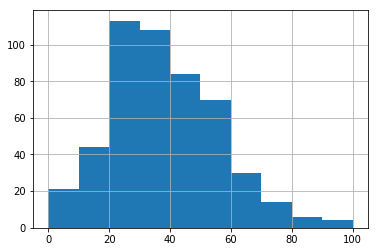

In [8]:
display(d.prop_saida.describe())
d.prop_saida.hist();

Parece que a partir do percentil 75 a _coisa é feia_ pois mais da metade dos professores saíram. 

Onde ficam essas escolas?

count   494.00
mean     23.20
std      15.76
min       1.00
10%       6.00
25%      11.00
50%      19.00
75%      32.00
90%      46.00
max      83.00
Name: CO_PESSOA_FISICA, dtype: float64

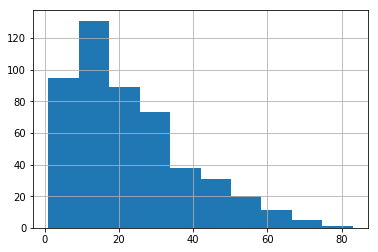

In [9]:
display(d.CO_PESSOA_FISICA.describe([.1,.25,.50,.75,.9]));
d.CO_PESSOA_FISICA.hist();

In [10]:
import folium

In [11]:
lclz_praca_3_poderes = [-15.7994, -47.8613]
map = folium.Map(location=lclz_praca_3_poderes, zoom_start=10)
locations = d.loc[d.CO_PESSOA_FISICA >= 7][['LAT', 'LONG']].head(20)
locationlist = locations.values.tolist()

In [12]:
display(d.loc[d.CO_PESSOA_FISICA >= 7].head(20))
locationlist


,CO_ENTIDADE,target,CO_PESSOA_FISICA,LAT,LONG,dcr,NO_ENTIDADE,CO_ORGAO_REGIONAL,prop_saida
39,53001664,12.00,12,-15.74,-47.90,Brasília*,CEF 316 NORTE,1,100.00
142,53004299,12.00,13,-15.82,-48.09,Taguatinga,CEF 21 DE TAGUATINGA,3,92.31
466,53015541,9.00,10,-15.90,-47.78,Riacho Fundo,CEI 03 DE SAO SEBASTIAO,18,90.00
267,53007727,10.00,12,-15.81,-48.10,Jardim**,EC 12 DE CEILANDIA,8,83.33
139,53004248,14.00,17,-15.81,-48.10,Taguatinga,EC 42 DE TAGUATINGA,3,82.35
162,53005201,9.00,11,-15.61,-48.12,Brazlândia,EC POLO AGRICOLA DA TORRE,4,81.82
3,53000846,8.00,10,-15.81,-47.90,Brasília*,CEF 01 DE BRASILIA,1,80.00
363,53009312,15.00,19,-15.85,-47.95,Paranoá,CEF 01 DA CANDANGOLANDIA,7,78.95
458,53014588,15.00,20,-15.91,-47.76,Riacho Fundo,EC BELA VISTA,18,75.00
26,53001524,6.00,8,-15.74,-47.89,Brasília*,EC 115 NORTE,1,75.00


[[-15.738902358999601, -47.8961599389996],
 [-15.817901298999601, -48.0929510429996],
 [-15.904125592999597, -47.7785940709996],
 [-15.8050091999996, -48.10484145499972],
 [-15.8064864849996, -48.09525081599961],
 [-15.609698454999599, -48.1223619759996],
 [-15.8134506469996, -47.899915633999605],
 [-15.8498777069996, -47.9501539469996],
 [-15.913146797999596, -47.7556934339996],
 [-15.7414110899996, -47.892307356999595],
 [-15.6790440299996, -48.2054488299996],
 [-15.8438864469996, -47.97246563899961],
 [-15.8318985429996, -48.08885317099961],
 [-15.7753419789996, -47.8831179469996],
 [-15.8264468869996, -47.90422259599961],
 [-15.768799452999597, -47.7831692639996],
 [-15.700134967999599, -48.2019363849996],
 [-15.659185897999599, -48.194383589999596],
 [-15.8506638219996, -48.1136286529996],
 [-15.832654795999598, -48.102884660999614]]

Pesquisei essas localizações no Google Maps e as algumas localizações não foram exatas mas deram uma aproximação aceitável (o pior caso ficou 6 quarteirões de distância).

In [14]:
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)
map.save('mapa.html')
map

Pontos de interessantes:
- Como explicar as saídas de escolas do Plano Piloto (Brasília)? Seriam elas exceções? 

Vamos plotar um mapa de calor das 50 piores e ver o que acontece.

In [15]:
#vamos tirar o 100% porque deve ter acontecido alguma coisa com essa escola
data = d.loc[(d.CO_PESSOA_FISICA >= 7) & (d.prop_saida < 100)][['LAT', 'LONG', 'prop_saida']].head(50).values.tolist()


In [17]:
from folium.plugins import HeatMap
m = folium.Map(lclz_praca_3_poderes)
HeatMap(data).add_to(m)
m.save('mapa.html')
m

Mais ou menos como esperado:
    - algumas áreas populosas e mais afastadas do centro estão bem destacadas.
    - Não esperava que o centro de Brasília fosse ter tanto destaque.
    
Assim temos algumas pistas que renda nas imediações nao tem muito a ver (Plano Pilo e Lago Sul). Vamos comprovar  
    

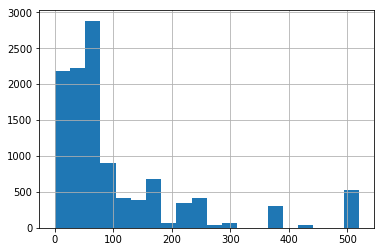

In [18]:
model_vars.MAX_qtd_dom_renda_max_per_mais_5sm.hist(bins=20)

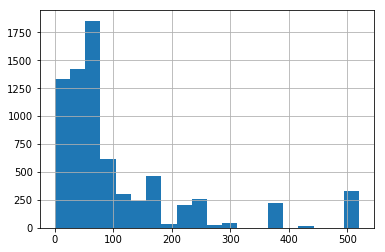

In [19]:
model_vars.loc[model_vars.target == 0].MAX_qtd_dom_renda_max_per_mais_5sm.hist(bins=20);

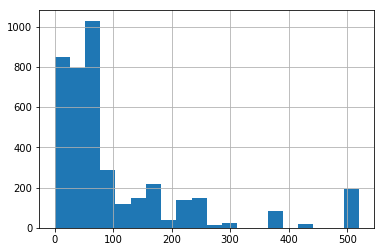

In [20]:
model_vars.loc[model_vars.target == 1].MAX_qtd_dom_renda_max_per_mais_5sm.hist(bins=20);

In [21]:
model_vars[['MAX_qtd_dom_renda_max_per_mais_5sm','target']].corr()

,MAX_qtd_dom_renda_max_per_mais_5sm,target
MAX_qtd_dom_renda_max_per_mais_5sm,1.00,-0.01
target,-0.01,1.00


A correlação diz aquilo que pode-se ver nos gráficos: a renda menor influencia muito pouco na mudança de escola.

#### Vamos ver todas as correlações com a target

In [22]:
cols_alta_correlacao =[]
for l in model_vars.drop('PROF_CO_PESSOA_FISICA',axis=1).set_index(['CO_PESSOA_FISICA','CO_ENTIDADE']).corr()[['target']].sort_values('target',ascending=False).reset_index().itertuples():
    display(str(l[1]) + ' ' + str(l[2]))
    if l[2] < -0.02 or l[2] > 0.02:
        cols_alta_correlacao.append(l[1])

'target 1.0'

'SUM_TURMA_IN_DISC_CIENCIAS 0.09261222130543663'

'SUM_TURMA_IN_TARDE 0.08005528104138582'

'MIN_TURMA_NU_DURACAO_TURMA 0.07182087175945935'

'IN_COMUM_FUND_AF 0.06650883071004288'

'MIN_TURMA_NU_DIAS_ATIVIDADE 0.056514520591229654'

'MAX_TURMA_NU_DURACAO_TURMA 0.05462160505634562'

'MAX_TURMA_NU_DIAS_ATIVIDADE 0.05160206579284069'

'IN_FUNDAMENTAL_CICLOS 0.047974537578467695'

'SUM_TURMA_IN_REGULAR 0.04488581753181263'

'SUM_TURMA_IN_DISC_GEOGRAFIA 0.044549617788217095'

'IN_ESGOTO_FOSSA 0.04440937919045113'

'SUM_TURMA_IN_DISC_LINGUA_INDIGENA 0.04345842553350792'

'SUM_TURMA_IN_DISC_LINGUA_FRANCES 0.04345552940387816'

'SUM_TURMA_IN_DISC_LINGUA_OUTRA 0.04315504599601616'

'SUM_TURMA_IN_DISC_ARTES 0.041380353525988296'

'SUM_TURMA_IN_DISC_HISTORIA 0.04135571967322635'

'SUM_TURMA_IN_DISC_OUTRAS 0.04106790135608206'

'SUM_TURMA_IN_DISC_LIBRAS 0.04089972999164004'

'LAT 0.040247586843958696'

'SUM_TURMA_IN_DISC_LINGUA_INGLES 0.040223397435667975'

'SUM_TURMA_IN_DISC_MATEMATICA 0.03825206326261129'

'SUM_TURMA_IN_DISC_LINGUA_PORTUGUESA 0.03794268090683334'

'MIN_qtd_alugados 0.03685350180922534'

'SUM_TURMA_IN_DISC_EDUCACAO_FISICA 0.0363860517852543'

'SUM_TURMA_IN_MAIS_EDUCACAO 0.035523042452695996'

'TP_ATIVIDADE_COMPLEMENTAR 0.03267320996098882'

'SUM_TURMA_IN_DISC_INFORMATICA_COMPUTACAO 0.031734601596416424'

'SUM_TURMA_IN_DISC_ENSINO_RELIGIOSO 0.031325711833753274'

'ALUNO_COUNT_CO_PESSOA_FISICA 0.03084300084469101'

'SUM_TURMA_IN_DIA_SEMANA_SEXTA 0.02896472768694154'

'SUM_TURMA_NU_DURACAO_TURMA 0.027196425988963605'

'SUM_TURMA_IN_DIA_SEMANA_QUARTA 0.02710463170198497'

'MIN_qtd_quitados 0.025016739008055896'

'MIN_renda_media_dom 0.023329060432318686'

'SUM_TURMA_IN_DIA_SEMANA_TERCA 0.023238682065033243'

'SUM_TURMA_NU_DIAS_ATIVIDADE 0.02305351284513054'

'SUM_TURMA_IN_DIA_SEMANA_SEGUNDA 0.022859504406993605'

'SUM_TURMA_IN_DIA_SEMANA_QUINTA 0.022475408709817304'

'MIN_qtd_pessoas_vizinhos 0.02099274416541413'

'MIN_qtd_dom_vizinhos 0.02032420899821386'

'MIN_qtd_domicilios 0.01956839423396525'

'MIN_qtd_pessoas 0.019561983065471113'

'IN_SALA_LEITURA 0.019347637273053865'

'IN_COMUM_FUND_AI 0.018719484671661818'

'IN_PATIO_COBERTO 0.018618351179201433'

'MIN_qtd_mulheres 0.01822088018798007'

'MIN_qtd_dom_renda_per_cap_abx_1sm_vizinhos 0.017526425519475454'

'NU_EQUIP_RETROPROJETOR_PER_MATRICULA 0.01679031216674425'

'MIN_qtd_mulheres_resp 0.016647480038282987'

'MIN_qtd_pss_abx_12 0.016162116849590565'

'NUM_DD_AULAS 0.015504199814631088'

'MIN_qtd_dom_renda_per_cap_abx_1sm 0.015477286235351502'

'IN_COMUM_EJA_FUND 0.015244383278982218'

'CO_ORGAO_REGIONAL 0.01461218293564707'

'TP_LOCALIZACAO 0.014328682737619669'

'MIN_ALUNO_MEAN_IN_TERRA_NATAL 0.014262821633512566'

'IN_ALMOXARIFADO 0.013992539976706792'

'IN_SALA_ATENDIMENTO_ESPECIAL 0.01310797437115466'

'MAX_ALUNO_MEAN_IN_ONIBUS 0.012837490196809706'

'MAX_qtd_cedidos 0.012345983641812934'

'NU_EQUIP_FOTO_PER_MATRICULA 0.011478929038461027'

'SUM_TURMA_IN_ESPECIAL_EXCLUSIVA 0.009683974799610364'

'NU_EQUIP_DVD_PER_MATRICULA 0.008422843959652206'

'NU_EQUIP_IMPRESSORA_MULT_PER_MATRICULA 0.008364884618625836'

'MAX_qtd_mulheres_resp 0.008274141962498408'

'SUM_TURMA_IN_PROFISSIONALIZANTE 0.008266301692308254'

'IN_BANHEIRO_CHUVEIRO 0.00815192753643313'

'MAX_ALUNO_MEAN_IN_TERRA_NATAL 0.008005163530783897'

'MIN_qtd_pss_acima_65 0.007400185506124178'

'IN_EQUIP_IMPRESSORA_MULT 0.007125830985418084'

'NU_EQUIP_VIDEOCASSETE_PER_MATRICULA 0.006871944717912859'

'IN_EQUIP_RETROPROJETOR 0.0065748430013997956'

'MIN_qtd_dom_renda_max_per_mais_5sm 0.005330517536381227'

'MAX_qtd_dom_renda_per_cap_abx_1sm_vizinhos 0.005030934893731763'

'MAX_qtd_dom_renda_per_cap_abx_1sm 0.004583543968825558'

'MIN_ALUNO_MEAN_IN_ONIBUS 0.0035630178064839264'

'NU_EQUIP_RETROPROJETOR 0.0035578148391586565'

'NU_EQUIP_PARABOLICA_PER_MATRICULA 0.0033040565677306456'

'MIN_DISTANCIA_SETOR_ENTIDADE 0.002981877064258401'

'MAX_ALUNO_MEAN_IN_H0MEM 0.0026598630030241492'

'NU_EQUIP_TV_PER_MATRICULA 0.0024834565511917964'

'SUM_TURMA_IN_EJA 0.0022310351619782144'

'MIN_qtd_em_aquisicao 0.0017953028153837663'

'SUM_TURMA_NU_MATRICULAS 0.0014140159128319077'

'IN_COMUM_PRE 0.0012812761147377649'

'NU_EQUIP_IMPRESSORA_MULT 0.0012796440721678719'

'MAX_qtd_pss_abx_12 0.0011136236083516366'

'MIN_TURMA_NU_MATRICULAS 0.0006904403919098164'

'MAX_qtd_pss_acima_90 -0.0009050896953769108'

'IN_LABORATORIO_CIENCIAS -0.0010716587987392365'

'MIN_ALUNO_MEAN_IN_H0MEM -0.0014080277645395006'

'NU_EQUIP_VIDEOCASSETE -0.0023717613245126433'

'NU_EQUIP_IMPRESSORA_PER_MATRICULA -0.0030093009623367744'

'LONG -0.0036440092211959116'

'IN_BIBLIOTECA -0.003671319454451185'

'SUM_qtd_dom_renda_per_cap_abx_1sm -0.003999218746006085'

'SUM_qtd_dom_renda_per_cap_abx_1sm_vizinhos -0.004444225159081135'

'MAX_TURMA_NU_MATRICULAS -0.006068629919032694'

'MAX_qtd_dom_renda_max_per_mais_5sm -0.0064512343403219955'

'NU_EQUIP_FOTO -0.006610767189514641'

'IN_DESPENSA -0.006968101221948884'

'SUM_qtd_cedidos -0.007287968415365244'

'IN_FINAL_SEMANA -0.007596126839695549'

'MIN_qtd_pss_acima_90 -0.007815043469134876'

'IN_QUADRA_ESPORTES_COBERTA -0.01016047763704136'

'NU_EQUIP_SOM_PER_MATRICULA -0.010309065791535977'

'IN_PARQUE_INFANTIL -0.011050962935593798'

'SUM_qtd_dom_renda_max_per_mais_5sm -0.011141657275385622'

'MAX_renda_media_dom -0.011200406832466345'

'MIN_qtd_cedidos -0.011642247942126063'

'NU_EQUIP_COPIADORA_PER_MATRICULA -0.011790895646366836'

'SUM_qtd_pss_acima_90 -0.01186467759885337'

'PC_SALAS_UTILIZADAS -0.012047851702221522'

'SUM_qtd_pss_abx_12 -0.01276301427557049'

'MAX_qtd_pss_acima_65 -0.013940316817964609'

'IN_EJA -0.014280624450460723'

'NU_EQUIP_SOM -0.014947365198641384'

'SUM_qtd_alugados -0.014961380028733878'

'IN_BIBLIOTECA_SALA_LEITURA -0.015527346024682899'

'MAX_DISTANCIA_SETOR_ENTIDADE -0.015788005223035348'

'SUM_qtd_pss_acima_65 -0.016419195131611077'

'NU_EQUIP_TV -0.016599184983508507'

'IN_ESP_EXCLUSIVA_FUND_AI -0.01745519660787506'

'MAX_qtd_alugados -0.017726300573150052'

'NU_COMP_ALUNO_PER_MATRICULA -0.01783872320303217'

'SUM_qtd_mulheres_resp -0.017993029941834538'

'SUM_qtd_pessoas_vizinhos -0.019055957711275905'

'SUM_qtd_pessoas -0.01920767655638484'

'SUM_qtd_dom_vizinhos -0.019290181271040093'

'SUM_qtd_domicilios -0.019297138033997605'

'IN_PATIO_DESCOBERTO -0.019374218621667025'

'SUM_qtd_quitados -0.019448329308482233'

'SUM_TURMA_IN_DISC_ESTUDOS_SOCIAIS -0.01948092605197646'

'SUM_qtd_mulheres -0.019654414497978487'

'IN_QUADRA_ESPORTES_DESCOBERTA -0.019931370014030655'

'IN_BANHEIRO_EI -0.019951147460941926'

'NU_EQUIP_MULTIMIDIA_PER_MATRICULA -0.02001187891787649'

'NU_EQUIP_DVD -0.020368452345219355'

'NU_EQUIP_FAX_PER_MATRICULA -0.020422433107424063'

'SUM_TURMA_IN_DISC_LINGUA_ESPANHOL -0.020806669451978493'

'IN_QUADRA_ESPORTES -0.021680769685387288'

'MAX_qtd_quitados -0.02199950751378335'

'SUM_TURMA_IN_DISC_FISICA -0.022608034176996004'

'SUM_TURMA_IN_DISC_SOCIOLOGIA -0.02276357479797977'

'MAX_qtd_pessoas -0.02381989323057228'

'MIN_ALUNO_MEAN_NU_IDADE -0.02385543093081482'

'MAX_qtd_pessoas_vizinhos -0.023978615788047174'

'QTD_CO_SETOR_CENSITARIO -0.024311427512385506'

'IN_DEPENDENCIAS_PNE -0.024385730769641553'

'MAX_qtd_domicilios -0.025105403636834375'

'MAX_qtd_dom_vizinhos -0.025105403636834375'

'NU_COMPUTADOR_PER_MATRICULA -0.025813507420059396'

'SUM_TURMA_IN_DISC_QUIMICA -0.02585702648596223'

'SUM_TURMA_IN_DISC_BIOLOGIA -0.02601586831875183'

'IN_COMUM_MEDIO_MEDIO -0.027088049522479028'

'MAX_qtd_mulheres -0.027495169007851004'

'SUM_TURMA_IN_DISC_EST_SOCIAIS_SOCIOLOGIA -0.02775278499317765'

'NU_COMP_ALUNO -0.028138702626557155'

'IN_ESPECIAL_EXCLUSIVA -0.028673886252537896'

'SUM_TURMA_IN_DISC_FILOSOFIA -0.02872741013300437'

'NU_EQUIP_PARABOLICA -0.029441944536583838'

'NU_COMP_ADMINISTRATIVO_PER_MATRICULA -0.029488692598691826'

'NU_PROFESSORES_PER_MATRICULA -0.02968215261785392'

'IN_AREA_VERDE -0.029951037558630066'

'IN_REFEITORIO -0.0304477135704239'

'IN_LABORATORIO_INFORMATICA -0.030489587552969186'

'IN_EQUIP_VIDEOCASSETE -0.03069540215442024'

'IN_BANHEIRO_PNE -0.031526661832979266'

'MAX_ALUNO_MEAN_NU_IDADE -0.0318234475897033'

'IN_EQUIP_FOTO -0.03248514227176294'

'IN_EQUIP_PARABOLICA -0.0337718123490843'

'NU_EQUIP_FAX -0.03684296301334032'

'IN_EQUIP_FAX -0.038688622760372667'

'NU_EQUIP_IMPRESSORA -0.0395901222647585'

'NU_SALAS_EXISTENTES_PER_MATRICULA -0.04251077774743626'

'NU_FUNCIONARIOS_PER_MATRICULA -0.043136660035038736'

'IN_ESGOTO_REDE_PUBLICA -0.04440937919045113'

'NU_SALAS_UTILIZADAS_PER_MATRICULA -0.045229645883492375'

'NU_EQUIP_COPIADORA -0.04813855777841364'

'SUM_TURMA_IN_MANHA -0.048311765161940266'

'SUM_qtd_em_aquisicao -0.05533856182539963'

'NU_COMP_ADMINISTRATIVO -0.05987242895373029'

'IN_AUDITORIO -0.060239851827722006'

'MAX_qtd_em_aquisicao -0.06743679322983907'

'NU_TTL_MATRICLAS -0.06973346556572664'

'NU_EQUIP_MULTIMIDIA -0.06974019590056026'

'NU_COMPUTADOR -0.07017789405131092'

'NU_SALAS_EXISTENTES -0.08505439526428835'

'NU_SALAS_UTILIZADAS -0.08750181181646156'

'NU_FUNCIONARIOS -0.10104218941789399'

### Uma modelagem com Random Forest para verificar as features mais importantes.

array([[1425,  441],
       [ 609,  391]])

Base de TREINO
             precision    recall  f1-score   support

      False       0.92      0.96      0.94      5483
       True       0.92      0.85      0.88      3112

avg / total       0.92      0.92      0.92      8595

Base de TESTE
             precision    recall  f1-score   support

      False       0.70      0.76      0.73      1866
       True       0.47      0.39      0.43      1000

avg / total       0.62      0.63      0.62      2866



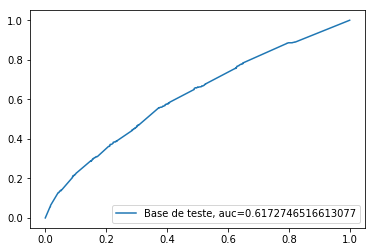

Feature ranking:
1. feature MIN_ALUNO_MEAN_NU_IDADE (0.107470)
2. feature MAX_ALUNO_MEAN_NU_IDADE (0.106204)
3. feature ALUNO_COUNT_CO_PESSOA_FISICA (0.095308)
4. feature SUM_TURMA_IN_MANHA (0.020160)
5. feature SUM_qtd_em_aquisicao (0.016604)
6. feature SUM_TURMA_IN_TARDE (0.016371)
7. feature NU_TTL_MATRICLAS (0.015794)
8. feature NU_COMPUTADOR_PER_MATRICULA (0.015765)
9. feature LAT (0.015400)
10. feature NU_FUNCIONARIOS (0.015331)
11. feature SUM_TURMA_NU_DURACAO_TURMA (0.015269)
12. feature NU_FUNCIONARIOS_PER_MATRICULA (0.015263)
13. feature NU_PROFESSORES_PER_MATRICULA (0.015153)
14. feature NU_COMP_ADMINISTRATIVO_PER_MATRICULA (0.014141)
15. feature NU_COMPUTADOR (0.013942)
16. feature QTD_CO_SETOR_CENSITARIO (0.013803)
17. feature NU_SALAS_UTILIZADAS_PER_MATRICULA (0.013747)
18. feature SUM_TURMA_IN_MAIS_EDUCACAO (0.013633)
19. feature MAX_qtd_em_aquisicao (0.013311)
20. feature NU_SALAS_EXISTENTES_PER_MATRICULA (0.013036)
21. feature NU_EQUIP_MULTIMIDIA_PER_MATRICULA (0.01290

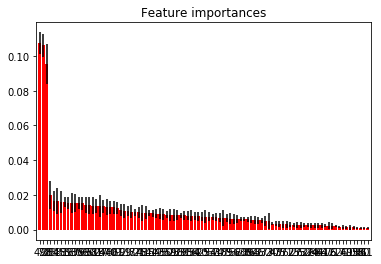

In [23]:
a = processa_tudo(model_vars[cols_alta_correlacao])

array([[1428,  438],
       [ 618,  382]])

Base de TREINO
             precision    recall  f1-score   support

      False       0.92      0.96      0.94      5483
       True       0.92      0.85      0.89      3112

avg / total       0.92      0.92      0.92      8595

Base de TESTE
             precision    recall  f1-score   support

      False       0.70      0.77      0.73      1866
       True       0.47      0.38      0.42      1000

avg / total       0.62      0.63      0.62      2866



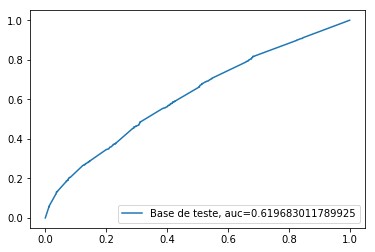

Feature ranking:
1. feature ALUNO_COUNT_CO_PESSOA_FISICA (0.170528)
2. feature MAX_ALUNO_MEAN_NU_IDADE (0.167958)
3. feature MIN_ALUNO_MEAN_NU_IDADE (0.160589)
4. feature LAT (0.087591)
5. feature NU_TTL_MATRICLAS (0.082770)
6. feature NU_FUNCIONARIOS (0.081225)
7. feature SUM_qtd_em_aquisicao (0.078156)
8. feature NU_COMPUTADOR_PER_MATRICULA (0.078091)
9. feature SUM_TURMA_IN_MANHA (0.048767)
10. feature SUM_TURMA_IN_TARDE (0.044324)


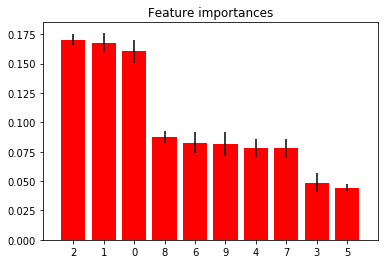

In [24]:
b = processa_tudo(model_vars[a[0][:10]+ ['target']])

array([[1381,  485],
       [ 645,  355]])

Base de TREINO
             precision    recall  f1-score   support

      False       0.86      0.92      0.89      5483
       True       0.84      0.74      0.79      3112

avg / total       0.85      0.86      0.85      8595

Base de TESTE
             precision    recall  f1-score   support

      False       0.68      0.74      0.71      1866
       True       0.42      0.35      0.39      1000

avg / total       0.59      0.61      0.60      2866



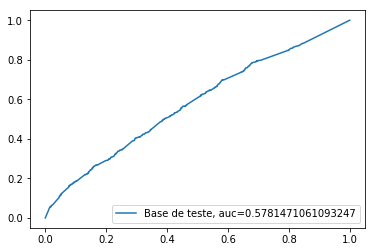

Feature ranking:
1. feature MAX_ALUNO_MEAN_NU_IDADE (0.353423)
2. feature MIN_ALUNO_MEAN_NU_IDADE (0.339134)
3. feature ALUNO_COUNT_CO_PESSOA_FISICA (0.307443)


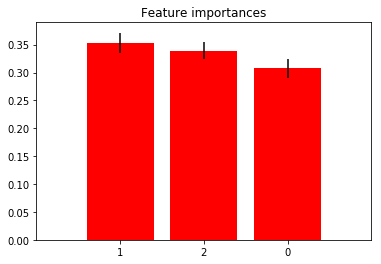

In [25]:
b = processa_tudo(model_vars[b[0][:3]+ ['target']])

<img src='https://media.giphy.com/media/3o6Mb2JwJPVu7VMDSw/giphy.gif'/>

#### Esse resultado está muito ruim (claramente com _overfitting_), vamos fazer uns ajustes com cross validation e grid search.

RandomizedSearchCV took 2.29 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.582 (std: 0.014)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 7, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.568 (std: 0.016)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 6, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.567 (std: 0.021)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 8, 'min_samples_split': 10}

GridSearchCV took 23.77 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.579 (std: 0.023)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}

Model with rank: 1
Mean validation score:

array([[873, 153],
       [157, 873]])

Base de TREINO
             precision    recall  f1-score   support

      False       0.57      0.58      0.58      3086
       True       0.58      0.57      0.57      3082

avg / total       0.58      0.58      0.58      6168

Base de TESTE
             precision    recall  f1-score   support

      False       0.85      0.85      0.85      1026
       True       0.85      0.85      0.85      1030

avg / total       0.85      0.85      0.85      2056



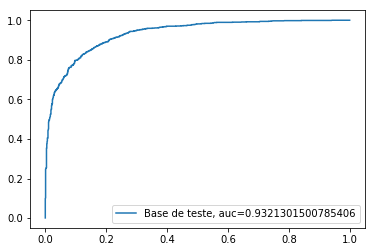

Feature ranking:
1. feature ALUNO_COUNT_CO_PESSOA_FISICA (0.035478)
2. feature MIN_ALUNO_MEAN_NU_IDADE (0.028214)
3. feature SUM_TURMA_NU_MATRICULAS (0.022145)
4. feature SUM_TURMA_IN_TARDE (0.020109)
5. feature MIN_ALUNO_MEAN_IN_H0MEM (0.018700)
6. feature MAX_ALUNO_MEAN_IN_H0MEM (0.018501)
7. feature NU_COMP_ADMINISTRATIVO (0.017985)
8. feature MAX_ALUNO_MEAN_NU_IDADE (0.017009)
9. feature MAX_DISTANCIA_SETOR_ENTIDADE (0.015327)
10. feature MAX_TURMA_NU_MATRICULAS (0.015277)
11. feature NU_EQUIP_MULTIMIDIA (0.015107)
12. feature NU_TTL_MATRICLAS (0.015091)
13. feature NU_COMPUTADOR (0.014572)
14. feature SUM_TURMA_IN_MANHA (0.014442)
15. feature NU_EQUIP_RETROPROJETOR_PER_MATRICULA (0.013531)
16. feature MIN_TURMA_NU_MATRICULAS (0.013076)
17. feature MAX_ALUNO_MEAN_IN_TERRA_NATAL (0.012647)
18. feature NU_PROFESSORES_PER_MATRICULA (0.012228)
19. feature SUM_qtd_cedidos (0.011941)
20. feature NU_SALAS_UTILIZADAS (0.011607)
21. feature MAX_qtd_pss_abx_12 (0.010943)
22. feature NU_EQUIP

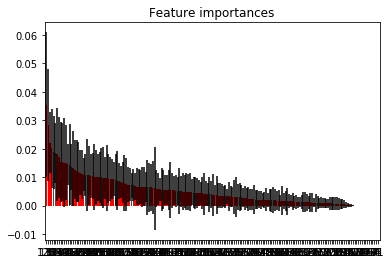

In [30]:
cols_drop = ['PROF_CO_PESSOA_FISICA','NO_ENTIDADE','dcr','LAT','LONG']
a = processa_tudo(model_vars.drop(cols_drop,axis=1).set_index(['CO_PESSOA_FISICA','CO_ENTIDADE']),True),

In [31]:
fi = a[0][0]
clf = a[0][1]

RandomizedSearchCV took 3.66 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.601 (std: 0.020)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 9, 'min_samples_split': 7}

Model with rank: 2
Mean validation score: 0.587 (std: 0.036)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.585 (std: 0.026)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 8, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.585 (std: 0.020)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 8, 'min_samples_split': 7}

GridSearchCV took 29.93 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score:

array([[991,  35],
       [ 40, 990]])

Base de TREINO
             precision    recall  f1-score   support

      False       0.56      0.57      0.57      3086
       True       0.57      0.56      0.56      3082

avg / total       0.56      0.56      0.56      6168

Base de TESTE
             precision    recall  f1-score   support

      False       0.96      0.97      0.96      1026
       True       0.97      0.96      0.96      1030

avg / total       0.96      0.96      0.96      2056



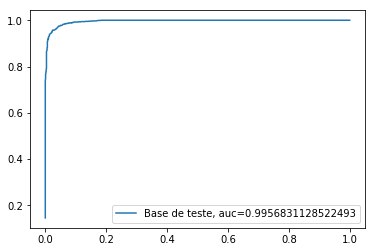

Feature ranking:
1. feature MAX_ALUNO_MEAN_NU_IDADE (0.048634)
2. feature MIN_ALUNO_MEAN_NU_IDADE (0.042083)
3. feature MAX_ALUNO_MEAN_IN_H0MEM (0.041435)
4. feature MIN_ALUNO_MEAN_IN_H0MEM (0.037651)
5. feature SUM_TURMA_NU_MATRICULAS (0.036886)
6. feature MAX_ALUNO_MEAN_IN_TERRA_NATAL (0.034592)
7. feature ALUNO_COUNT_CO_PESSOA_FISICA (0.033058)
8. feature MIN_ALUNO_MEAN_IN_TERRA_NATAL (0.030249)
9. feature MAX_TURMA_NU_MATRICULAS (0.029335)
10. feature NU_PROFESSORES_PER_MATRICULA (0.027801)
11. feature MIN_TURMA_NU_MATRICULAS (0.027115)
12. feature SUM_TURMA_IN_MANHA (0.025671)
13. feature SUM_TURMA_IN_DISC_CIENCIAS (0.024146)
14. feature NU_COMPUTADOR_PER_MATRICULA (0.022111)
15. feature MAX_DISTANCIA_SETOR_ENTIDADE (0.021933)
16. feature NU_EQUIP_MULTIMIDIA_PER_MATRICULA (0.021616)
17. feature NU_FUNCIONARIOS (0.019995)
18. feature NU_SALAS_UTILIZADAS_PER_MATRICULA (0.019774)
19. feature NU_TTL_MATRICLAS (0.019481)
20. feature NU_COMPUTADOR (0.018726)
21. feature SUM_TURMA_IN_DIS

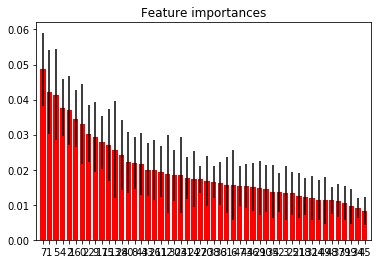

In [32]:
md_b = model_vars.set_index(['CO_PESSOA_FISICA','CO_ENTIDADE'])[fi[:50] + ['target']]
b = processa_tudo(md_b,True),

In [33]:
clf = b[0][1]

### Consideracoes:
01. Com Grid Search a performance melhora consideravelmente.

02. O resultado retirando uma amostra da base para balancear (com o ```sample``` do pandas ) ficou estranho, resultado muito bom no teste e ruim no treino e quando aplica-se a todo o dataset.

### Com esse resultado estamos assim:
<!--
<img src='img/homer-simpson-woohoo-gif-6.gif'/>
-->

## Primeiro, vamos analisar quando o classificador erra.

In [34]:
y_true = md_b.target
X = md_b.drop('target',axis=1).values
y_pred = clf.predict(X)
lc = [c for y1,y2,c in zip(y_true,y_pred,md_b.index) if y1 != y2]

In [ ]:
1 - len(lc)/len(md_b.index)